# **Paisabazaar Banking Fraud Analysis**    



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual(Anustup Hazra)

# **Project Summary -**

This machine learning project focuses on analyzing customer-level data to improve personalization for financial offerings on the Paisabazaar platform. The dataset provided includes features such as user demographics, income details, spending behavior, and possibly credit-related variables.

📌Key Objectives:

• Perform exploratory data analysis (EDA) to identify trends and anomalies.

• Preprocess the dataset by handling missing values, encoding categorical data, and scaling numerical features.

• Apply various supervised machine learning algorithms to predict a customer's interest or eligibility.

• Evaluate models using classification metrics such as accuracy, F1-score, and AUC-ROC.

• Tune hyperparameters using cross-validation and techniques like Grid Search or Bayesian Optimization.

• Extract feature importance to understand key factors influencing customer decisions.

• Translate model results into business insights to guide product targeting and marketing.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Paisabazaar, a leading online financial marketplace, aims to improve its customer targeting and personalization strategies. The goal of this project is to build a machine learning model that can predict a customer’s interest in specific financial products or services based on their demographic and behavioral attributes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [66]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import joblib


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/dataset-2.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("data set Data Shape: ", df.shape)

data set Data Shape:  (100000, 28)


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("Dataset Duplicate Rows: ", df.duplicated().sum())

Dataset Duplicate Rows:  0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("Dataset Missing Values:\n", df.isnull().sum())

Dataset Missing Values:
 ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


Text(0.5, 1.0, 'Missing Values in Sales Data')

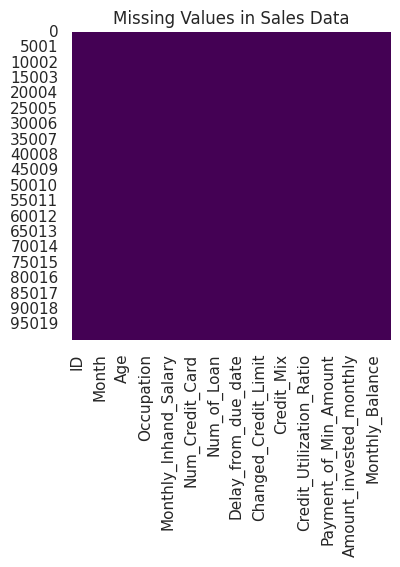

In [8]:
# Visualize missing values
sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Sales Data')

### What did you know about your dataset?

Tere is no missing or null and duplicate values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [10]:
# Dataset Describe
print("Dataset Description:\n", df.describe(include='all'))

Dataset Description:
                    ID    Customer_ID          Month      Name            Age  \
count   100000.000000  100000.000000  100000.000000    100000  100000.000000   
unique            NaN            NaN            NaN     10128            NaN   
top               NaN            NaN            NaN  Jessicad            NaN   
freq              NaN            NaN            NaN        48            NaN   
mean     80631.500000   25982.666640       4.500000       NaN      33.316340   
std      43301.486619   14340.543051       2.291299       NaN      10.764812   
min       5634.000000    1006.000000       1.000000       NaN      14.000000   
25%      43132.750000   13664.500000       2.750000       NaN      24.000000   
50%      80631.500000   25777.000000       4.500000       NaN      33.000000   
75%     118130.250000   38385.000000       6.250000       NaN      42.000000   
max     155629.000000   50999.000000       8.000000       NaN      56.000000   

                 

In [ ]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:", categorical_cols)


Categorical columns: ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Dataset Unique Values:\n", df.nunique(),"\n")

Dataset Unique Values:
 ID                          34157
Customer_ID                  4270
Month                           8
Name                         3969
Age                            43
SSN                          4270
Occupation                     15
Annual_Income                4269
Monthly_Inhand_Salary        4526
Num_Bank_Accounts              11
Num_Credit_Card                12
Interest_Rate                  34
Num_of_Loan                    10
Type_of_Loan                 2482
Delay_from_due_date            63
Num_of_Delayed_Payment         26
Changed_Credit_Limit         2923
Num_Credit_Inquiries           18
Credit_Mix                      3
Outstanding_Debt             4229
Credit_Utilization_Ratio    34156
Credit_History_Age            404
Payment_of_Min_Amount           3
Total_EMI_per_month          4057
Amount_invested_monthly      4191
Payment_Behaviour               6
Monthly_Balance             33594
Credit_Score                    3
dtype: int64 



## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

#Drop rows with missing values
df.dropna(inplace=True)

Missing Values:
 Series([], dtype: int64)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

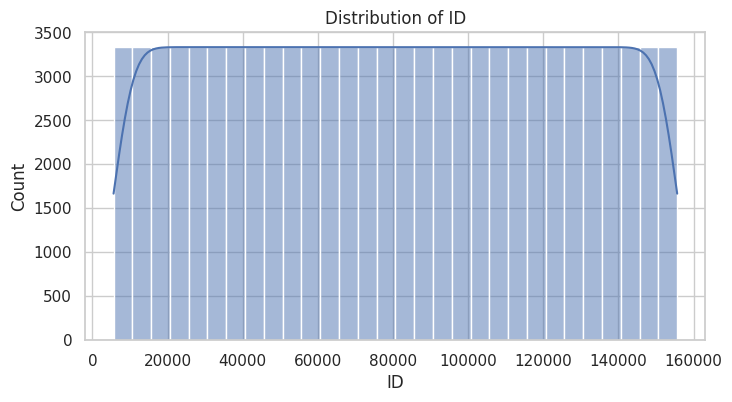

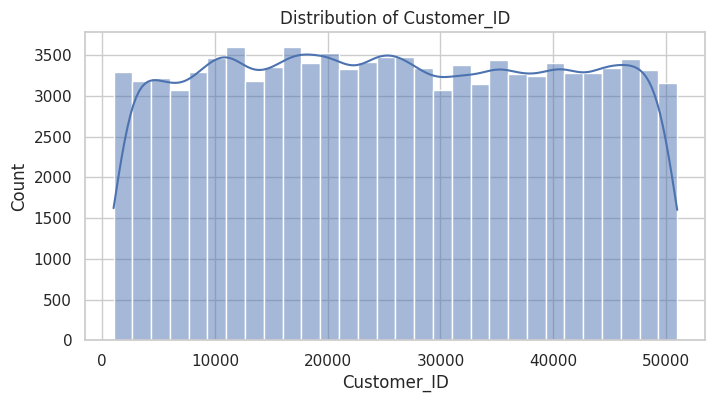

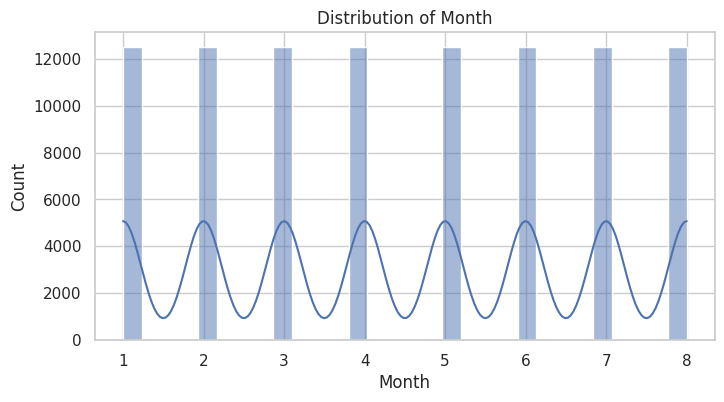

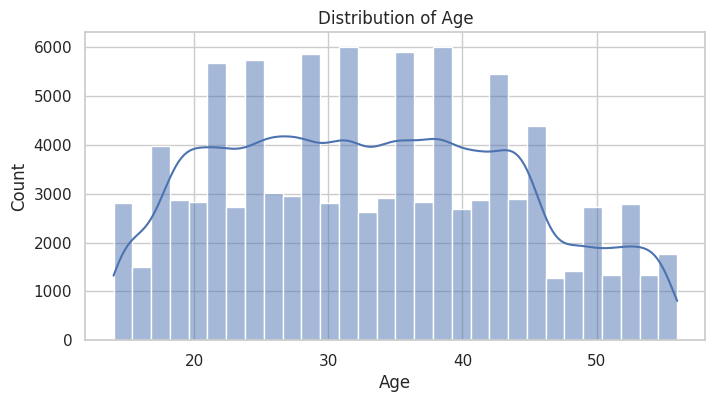

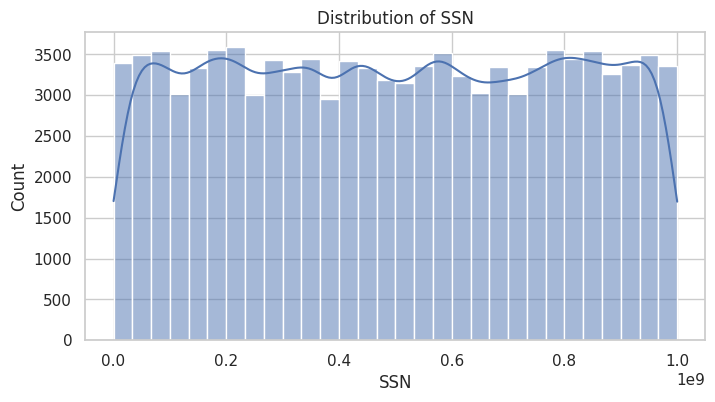

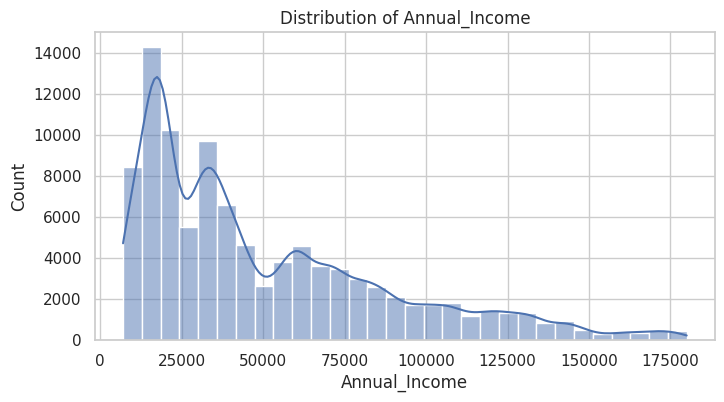

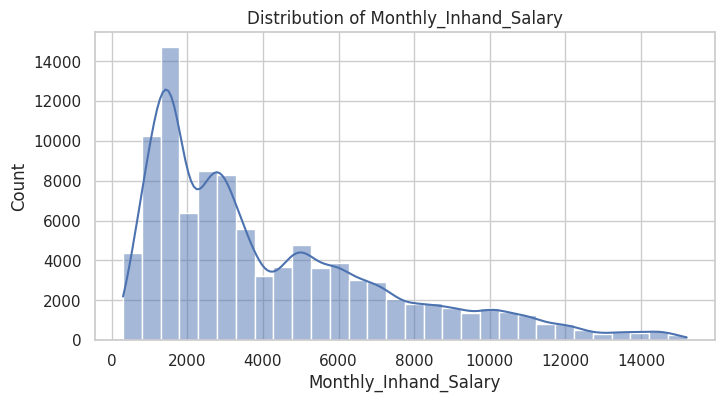

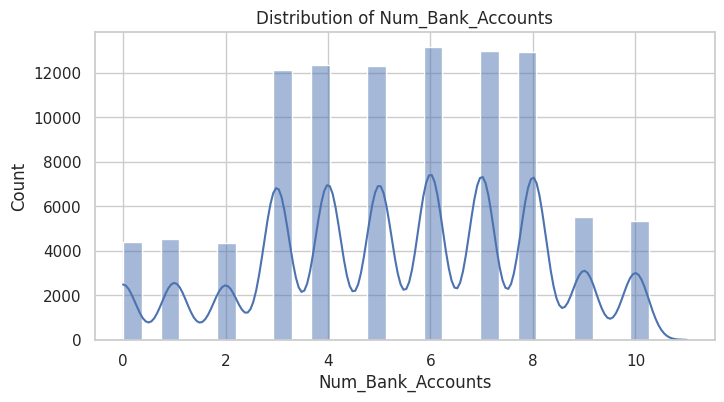

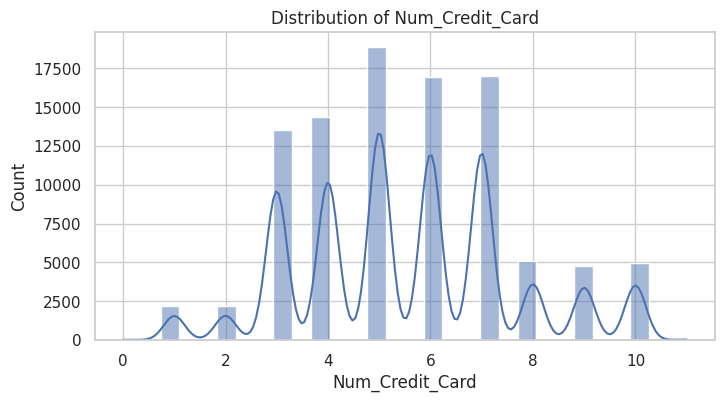

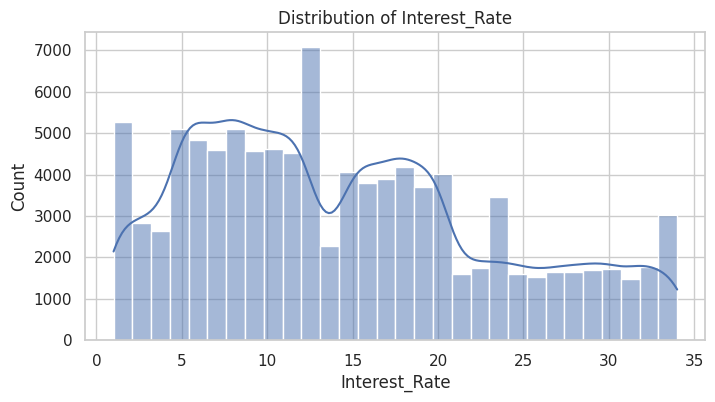

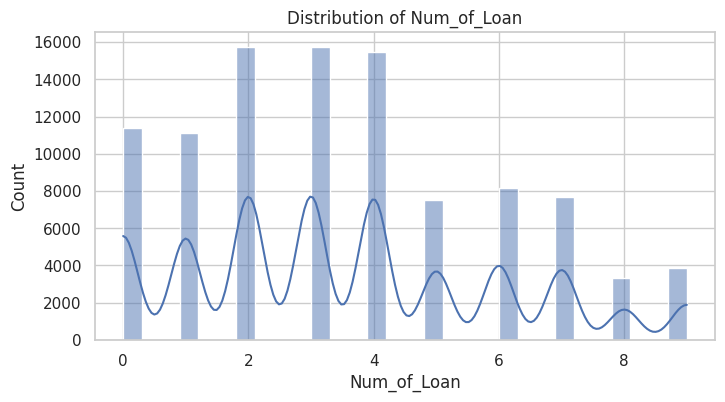

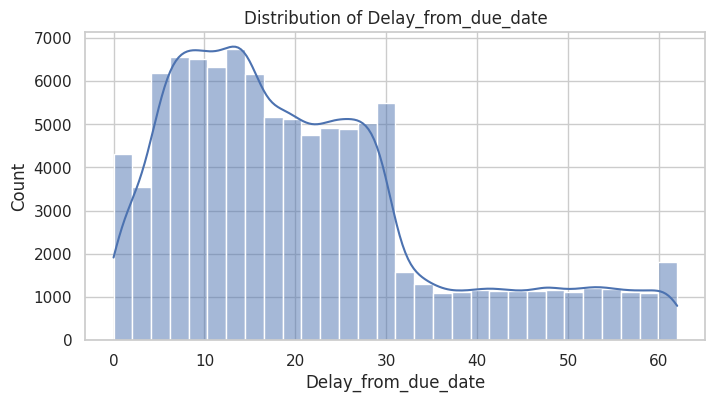

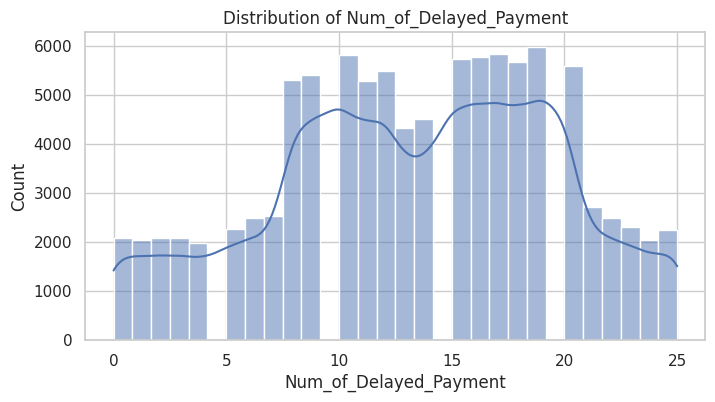

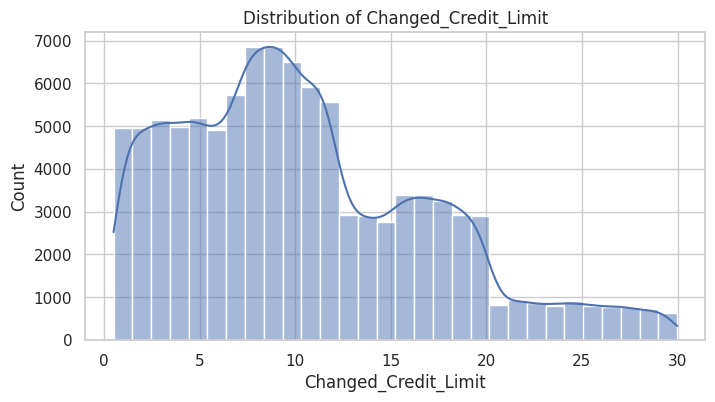

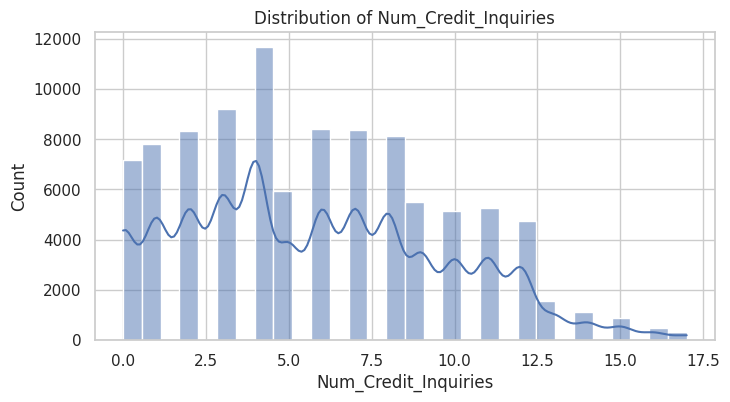

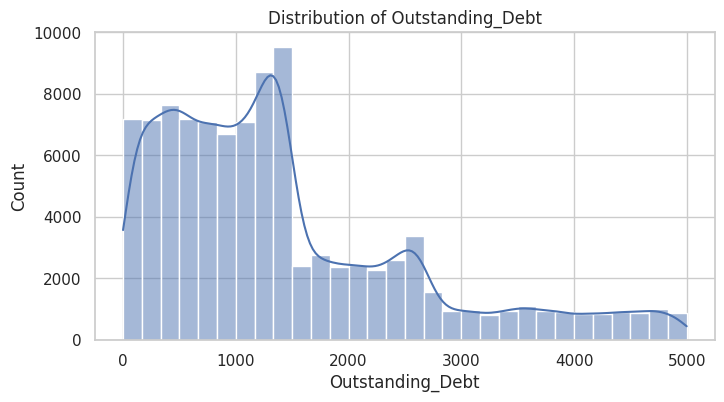

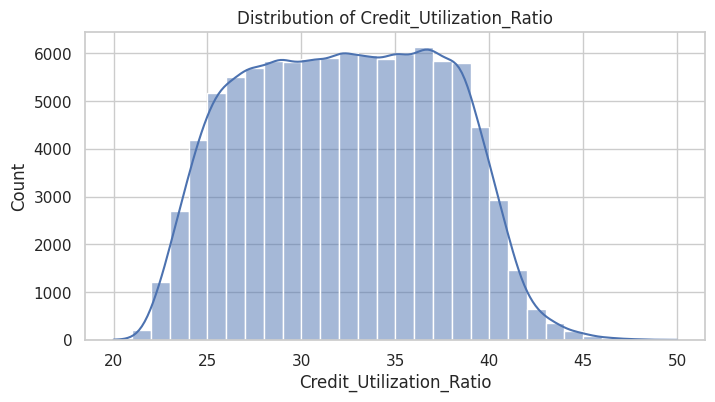

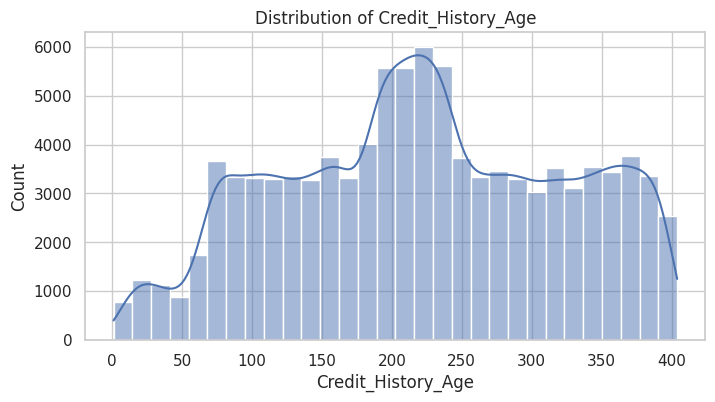

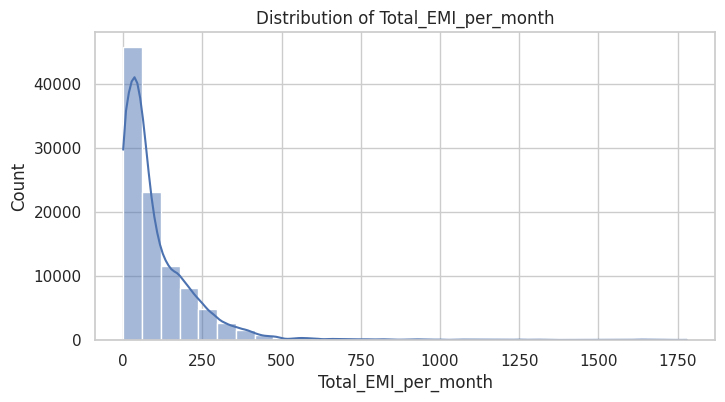

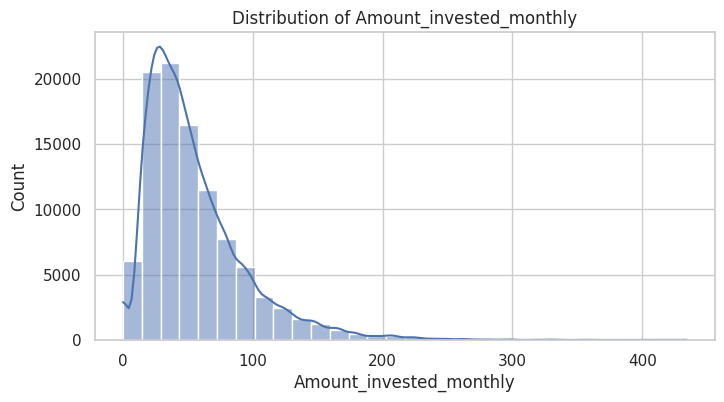

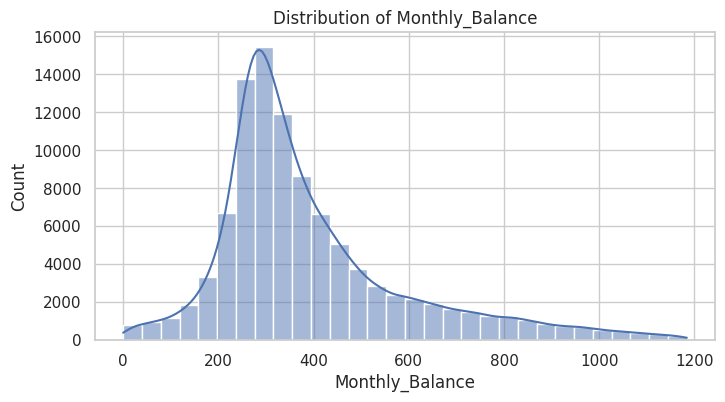

In [17]:
# Chart - 1 Distribution Plot of Numerical Features
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

##### 1. Why did you pick the specific chart?

To examine the spread of each numerical variable.

##### 2. What is/are the insight(s) found from the chart?

Uncovers skewed distributions, outliers, and helps decide if transformation is needed.

#### Chart - 2

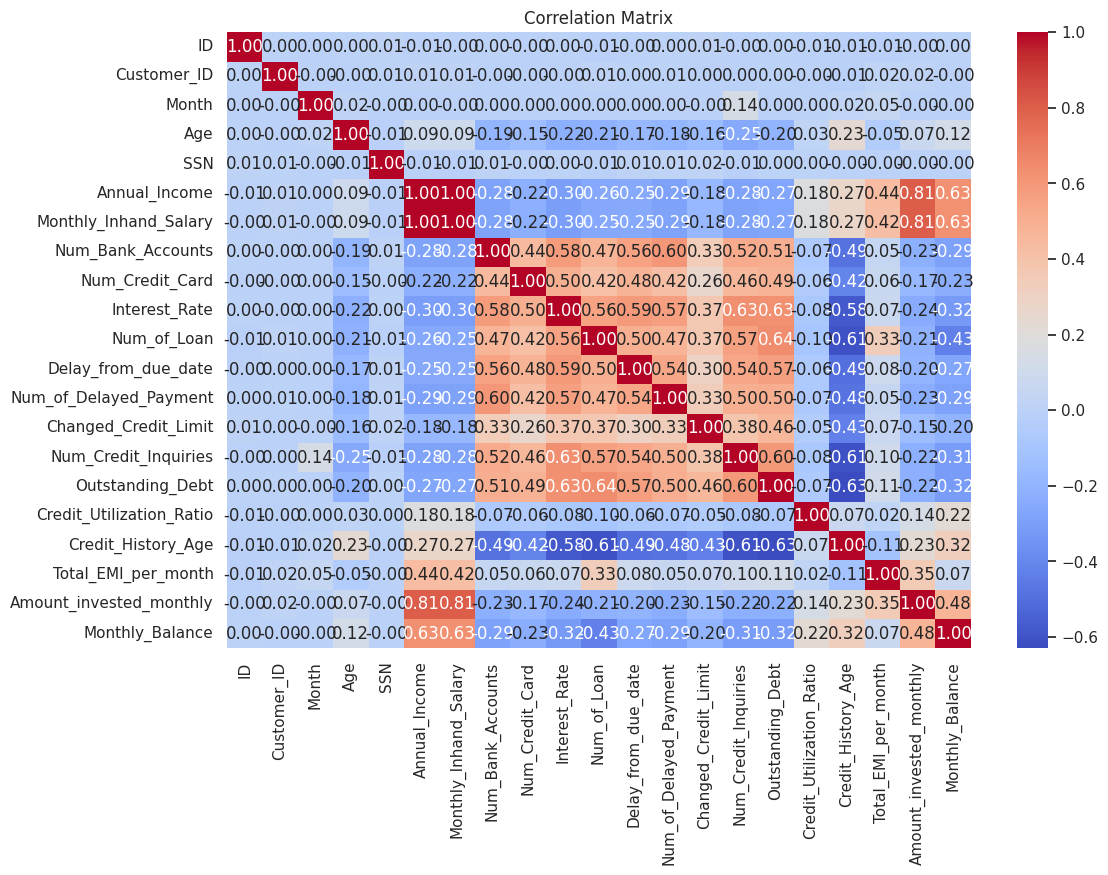

In [22]:
# Chart - 2 Correlation Matrix (Numerical)
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##### 1. Why did you pick the specific chart?

To detect multicollinearity between numerical features

##### 2. What is/are the insight(s) found from the chart?

Reveals strong or weak relationships between variables, useful for feature selection.

#### Chart - 3

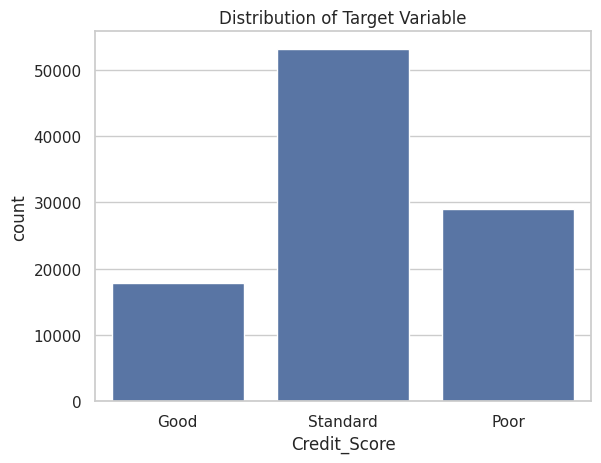

In [24]:
# Chart - 3 Count Plot for Target Variable
target = df.columns[-1]
sns.countplot(x=target, data=df)
plt.title("Distribution of Target Variable")
plt.show()


##### 1. Why did you pick the specific chart?

To understand the balance of the target variable.

##### 2. What is/are the insight(s) found from the chart?

Checks for class imbalance which affects model training and metric choice.

#### Chart - 4

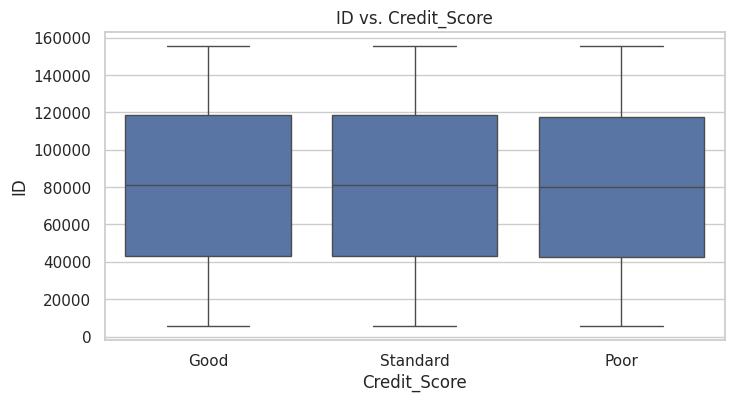

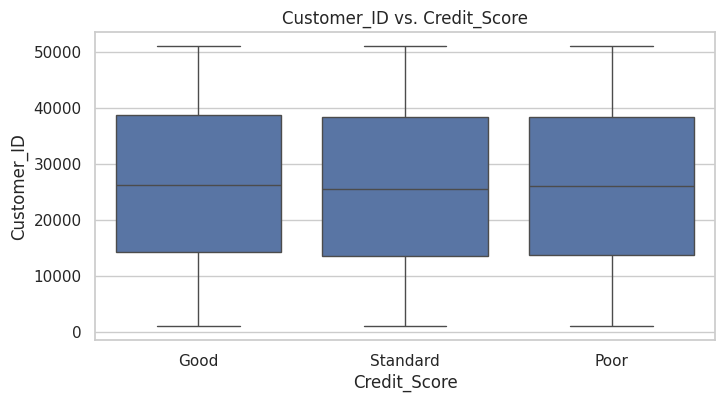

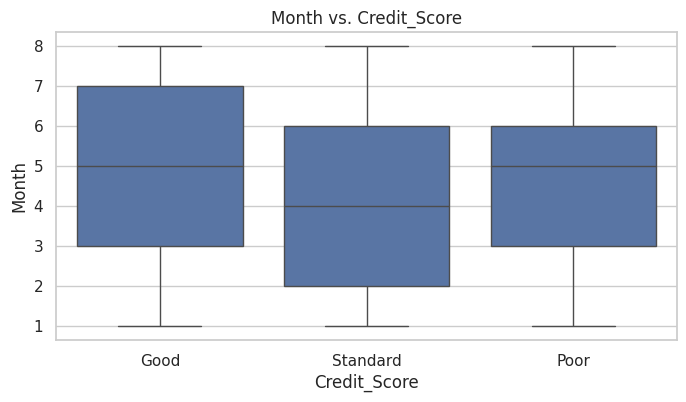

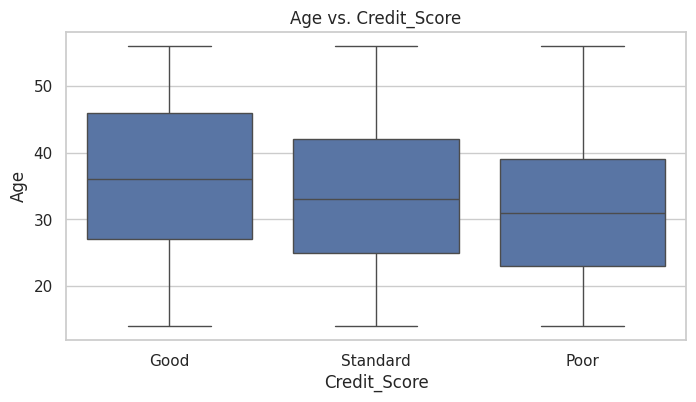

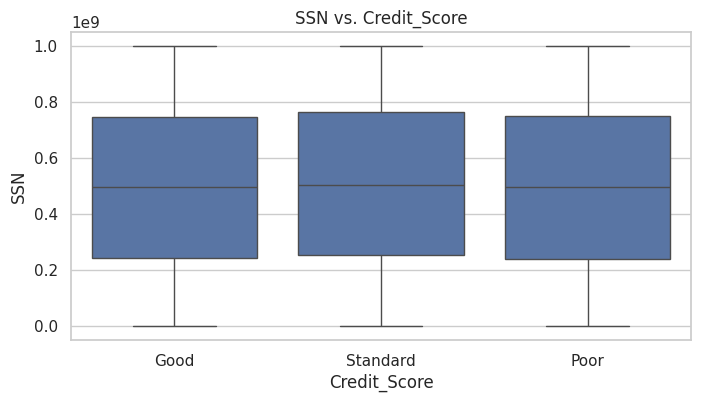

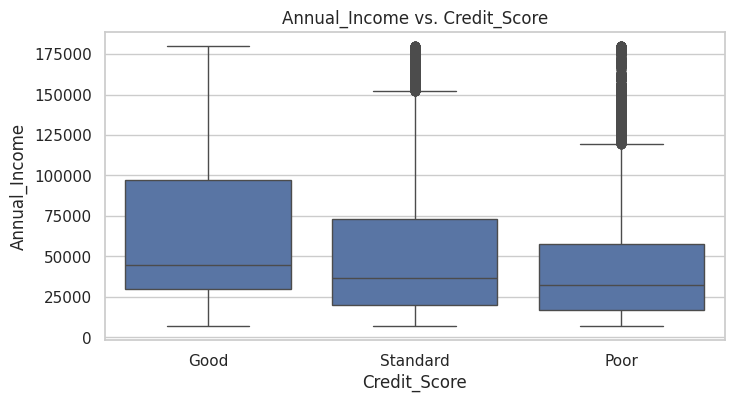

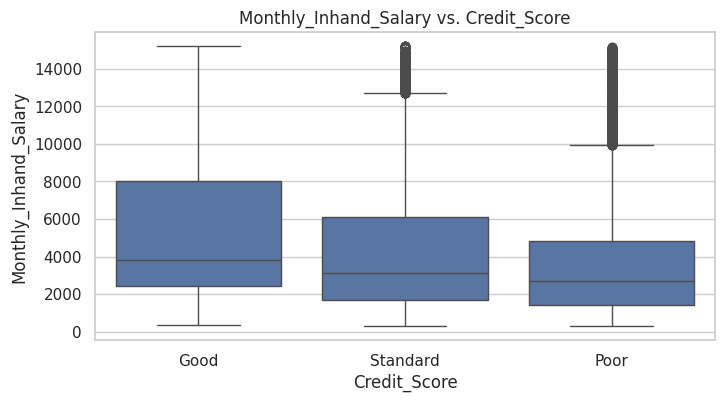

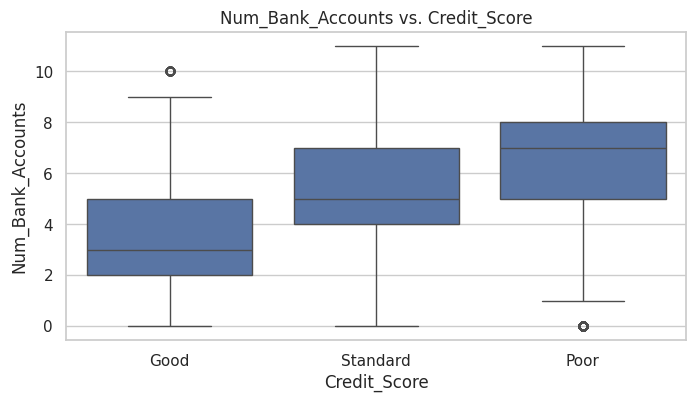

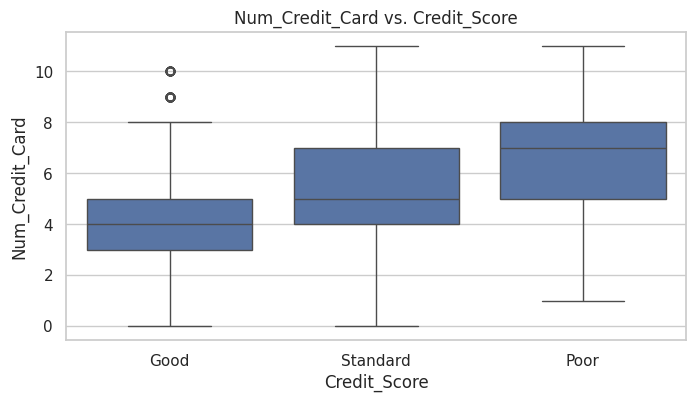

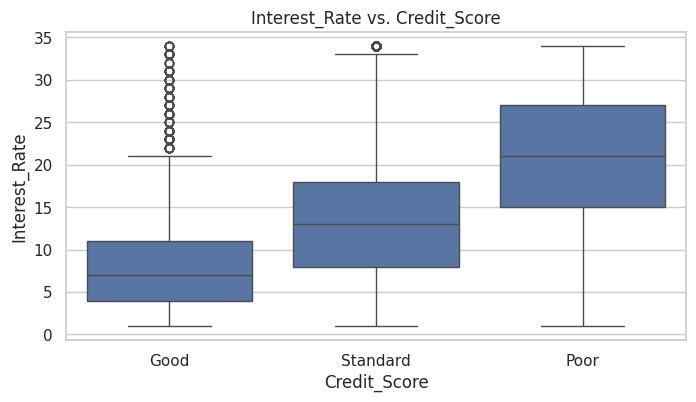

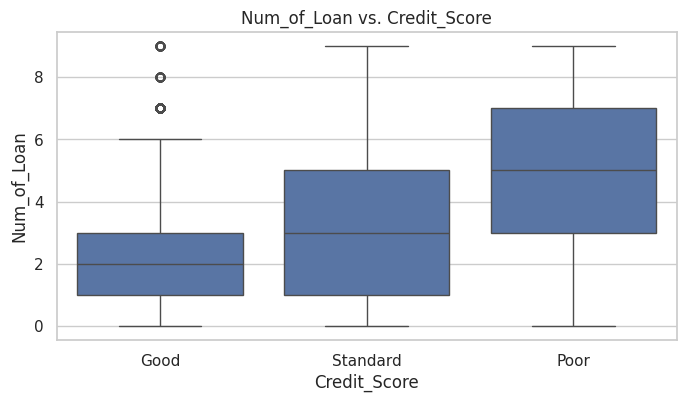

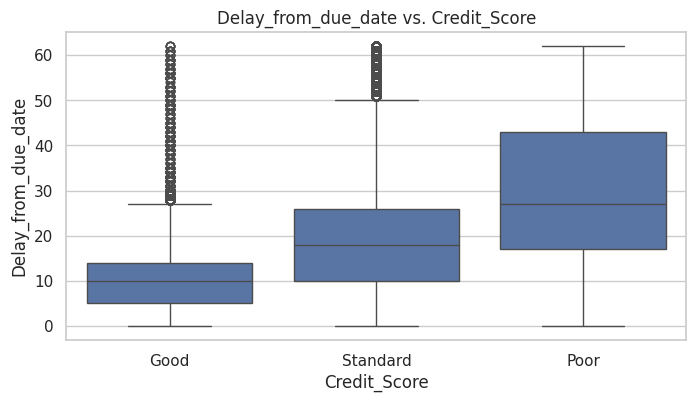

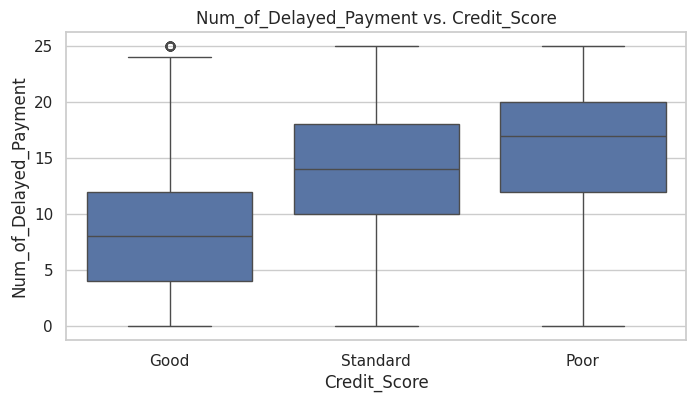

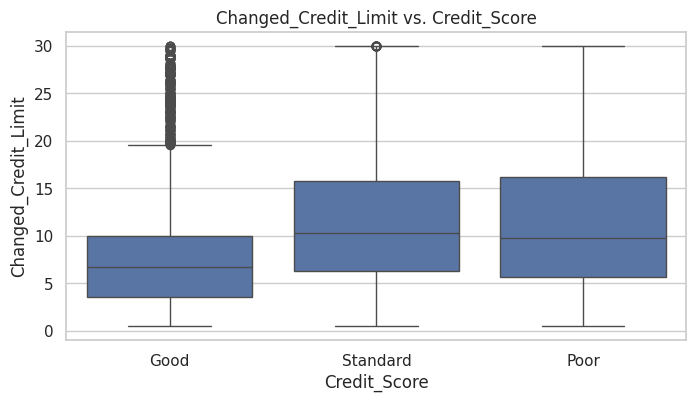

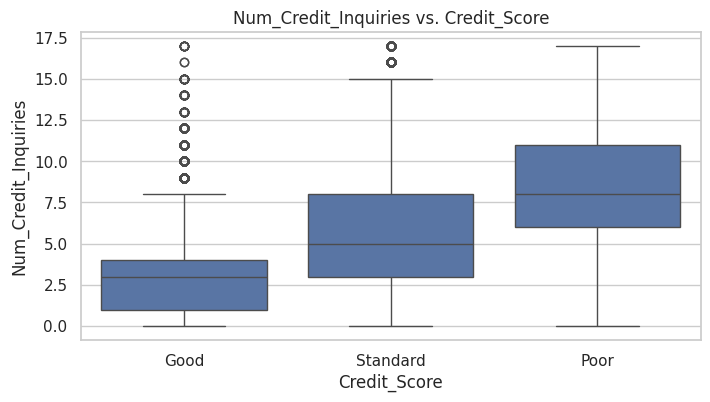

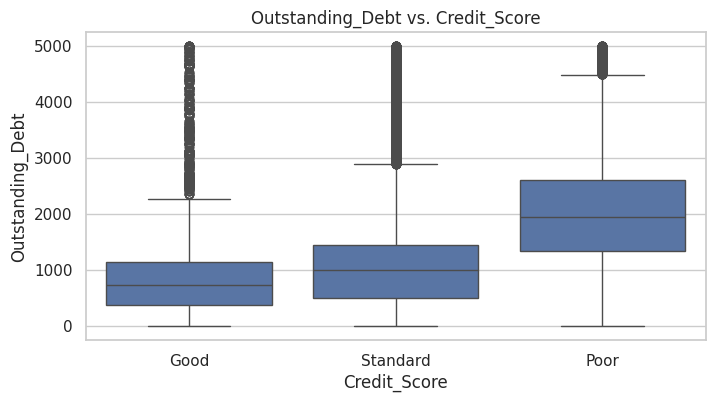

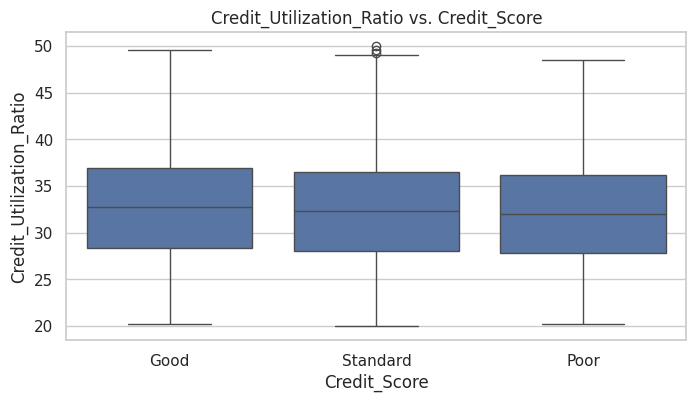

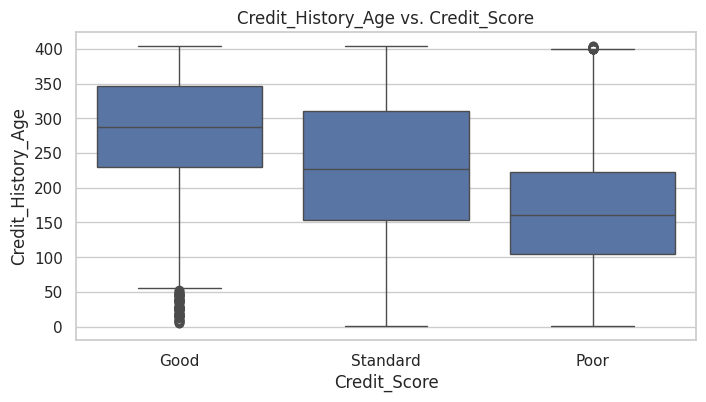

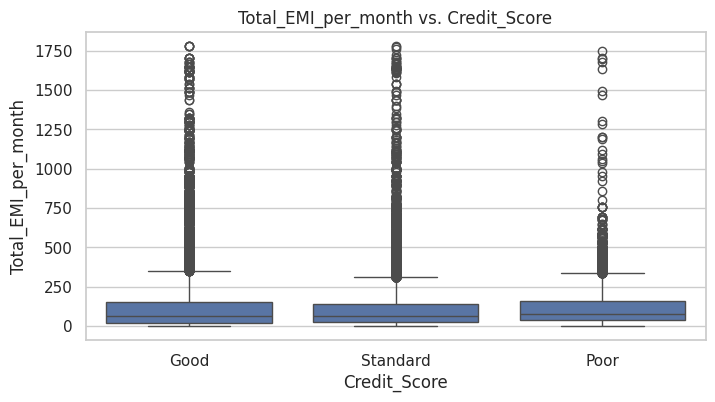

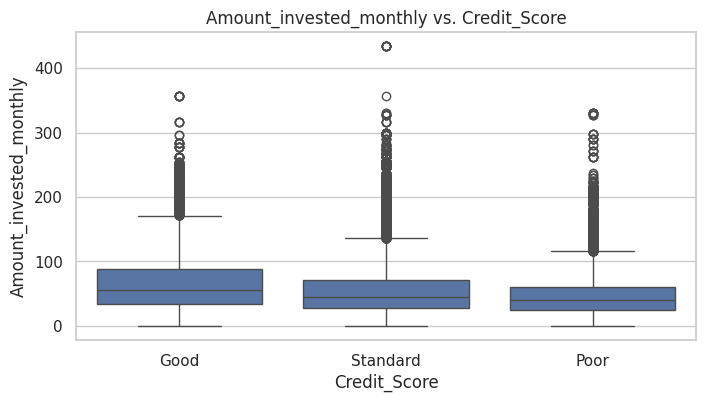

In [28]:
# Chart - 4 Boxplot of Numerical Features vs. Target
for col in df.select_dtypes(include='number').columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs. {target}")
    plt.show()

##### 1. Why did you pick the specific chart?

To detect outliers and distribution across classes

##### 2. What is/are the insight(s) found from the chart?

Shows median, spread, and skew for different target categories.

#### Chart - 5

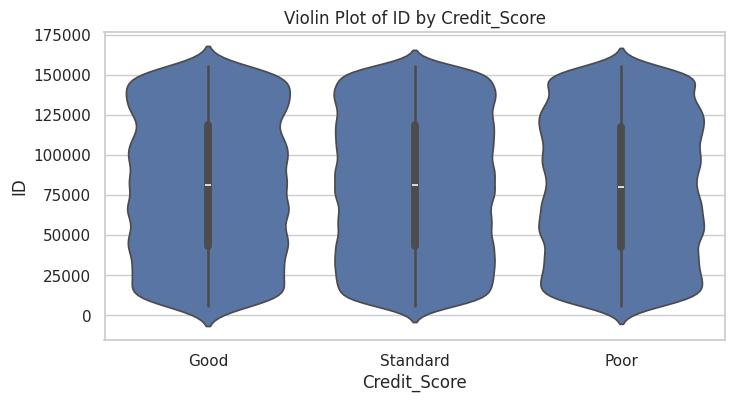

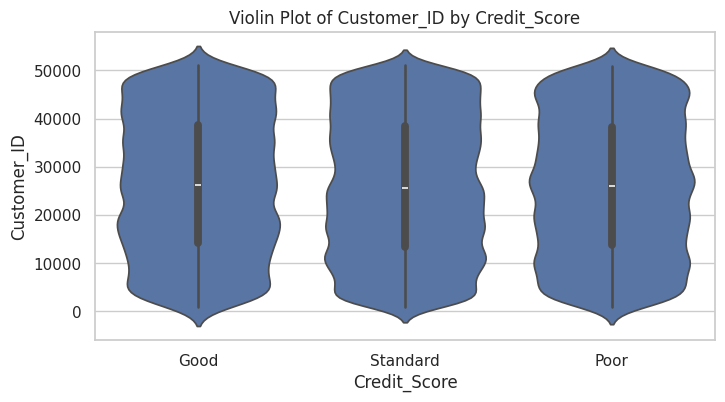

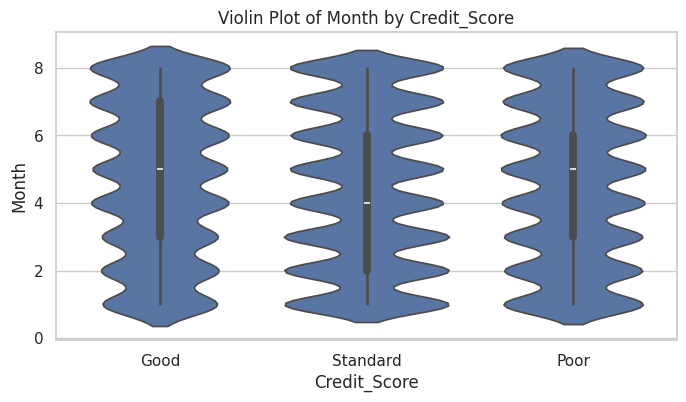

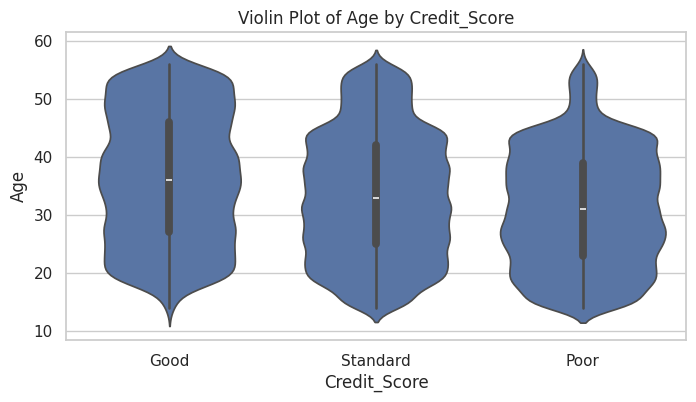

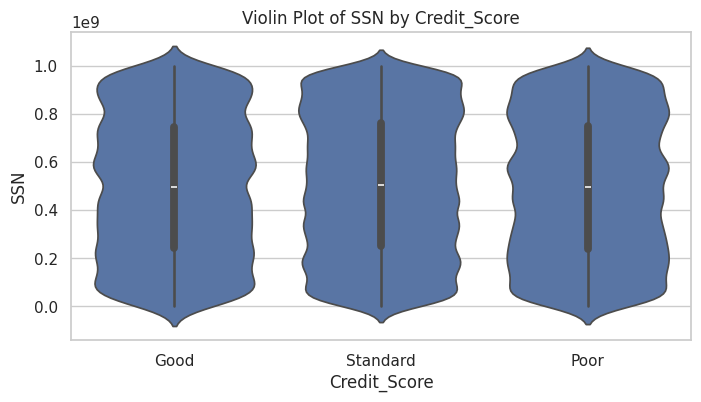

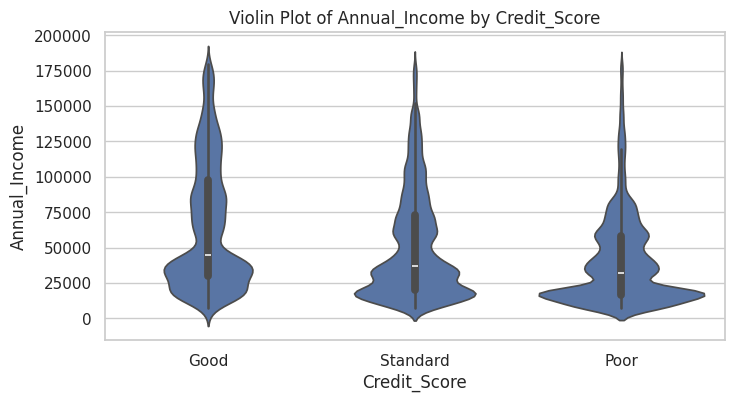

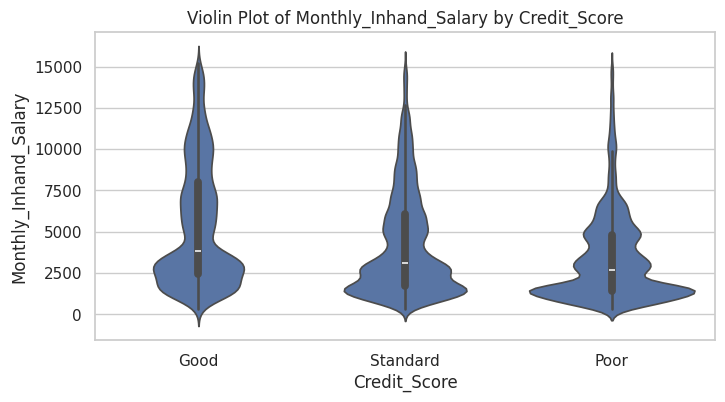

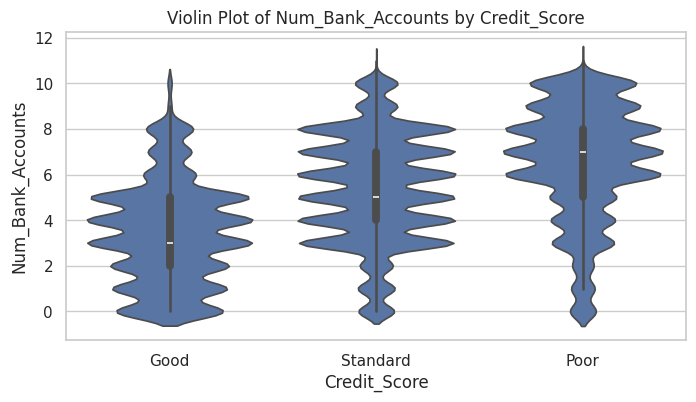

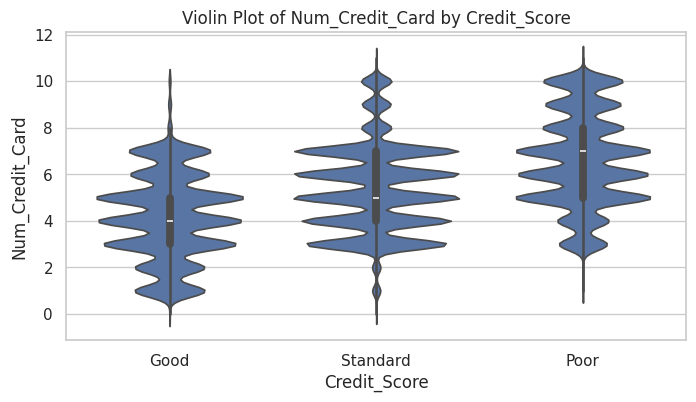

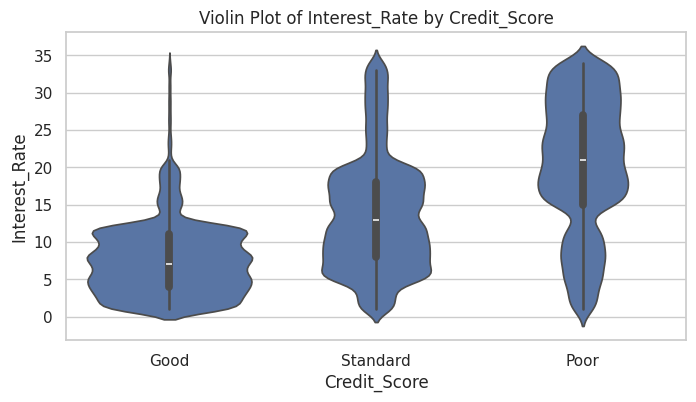

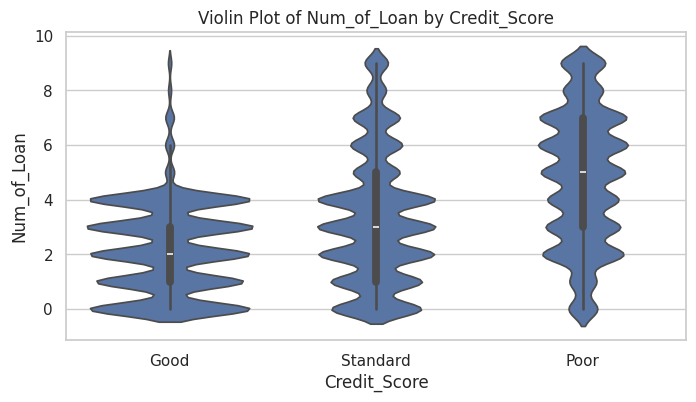

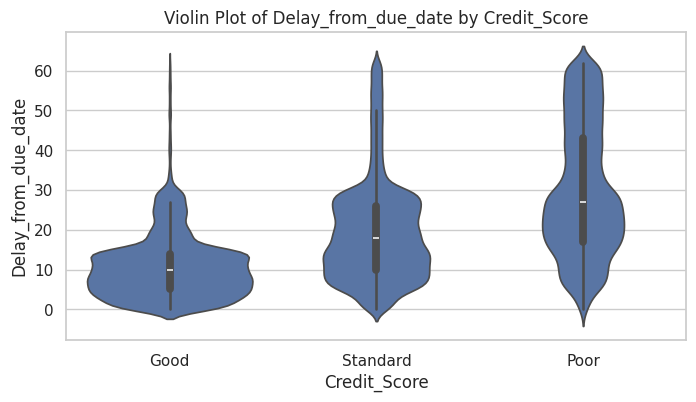

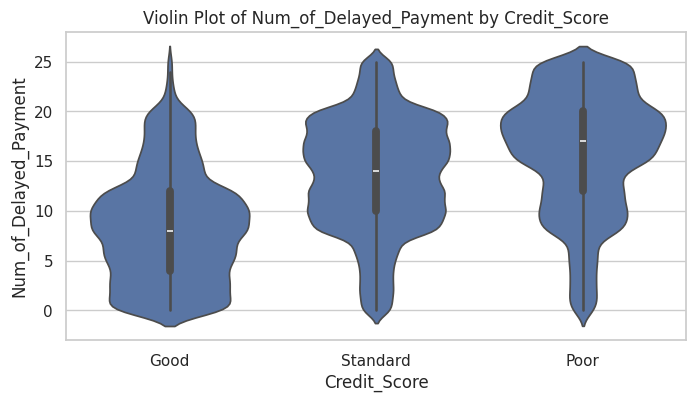

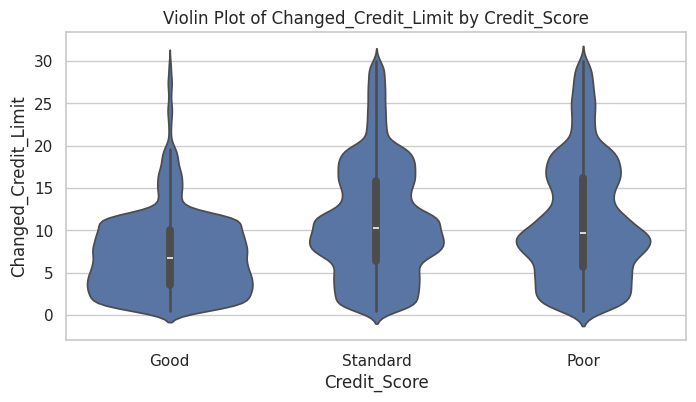

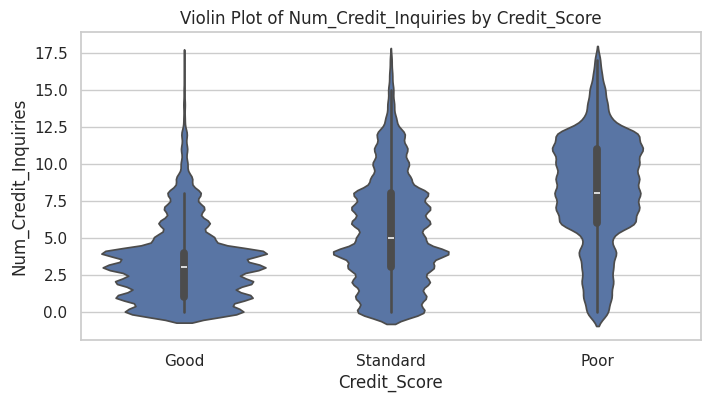

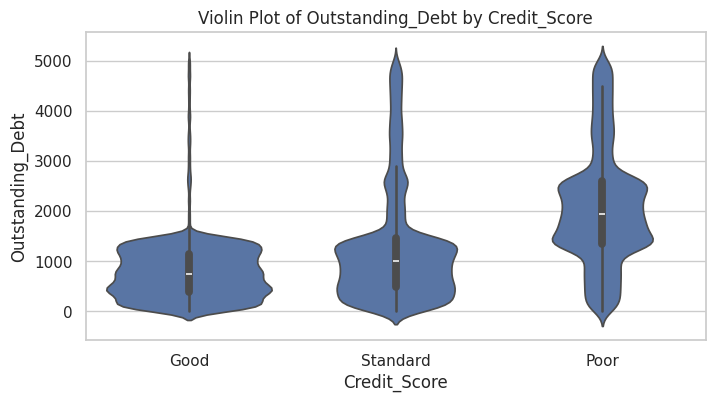

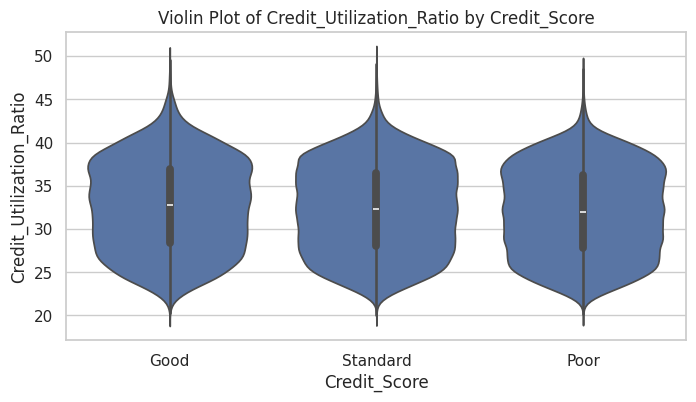

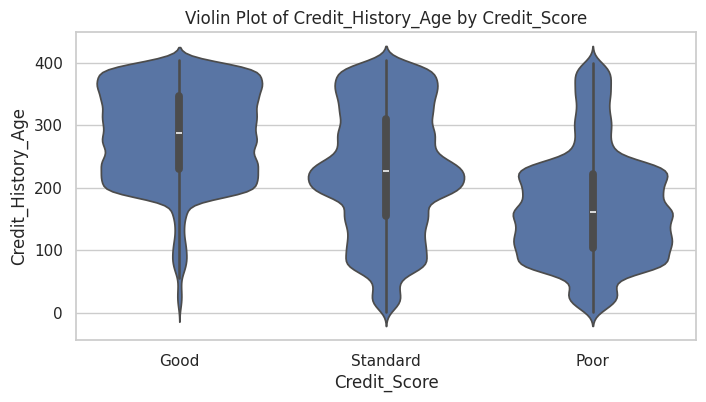

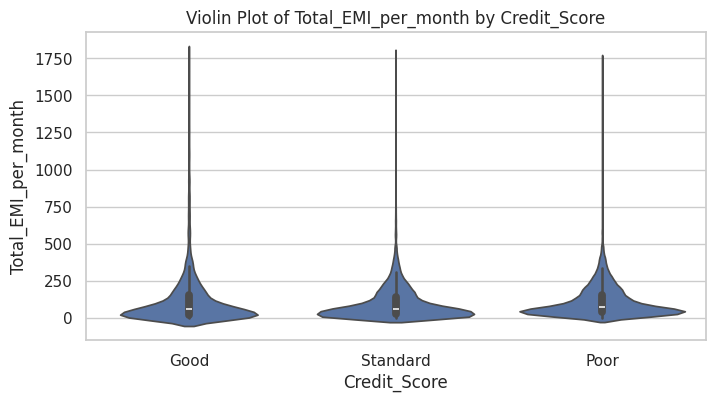

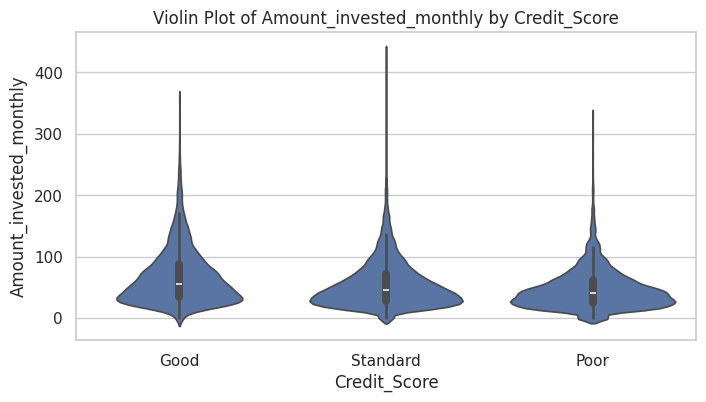

In [29]:
# Chart - 5 Violin Plot for Feature vs. Target
for col in df.select_dtypes(include='number').columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=target, y=col, data=df)
    plt.title(f"Violin Plot of {col} by {target}")
    plt.show()

##### 1. Why did you pick the specific chart?

To analyze data density + distribution in one view.

##### 2. What is/are the insight(s) found from the chart?

Merges boxplot + KDE for more detailed class-wise distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

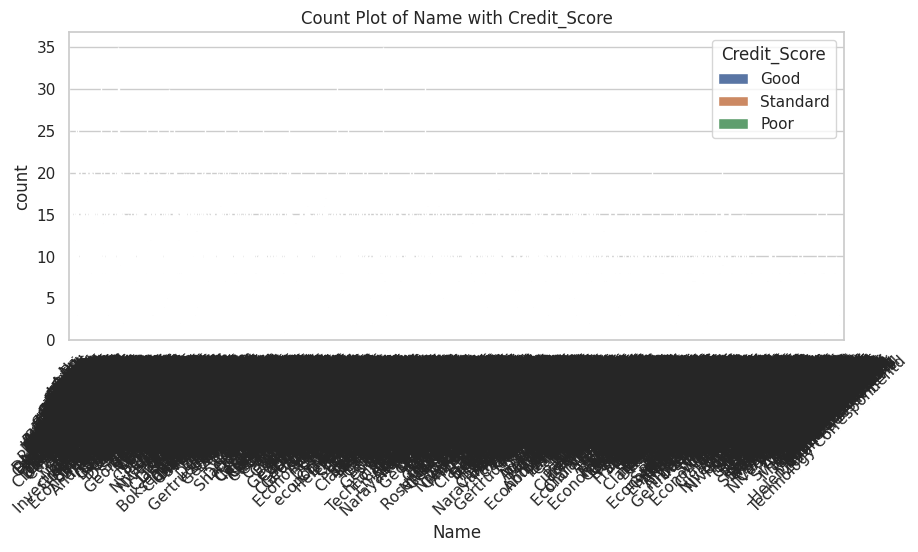

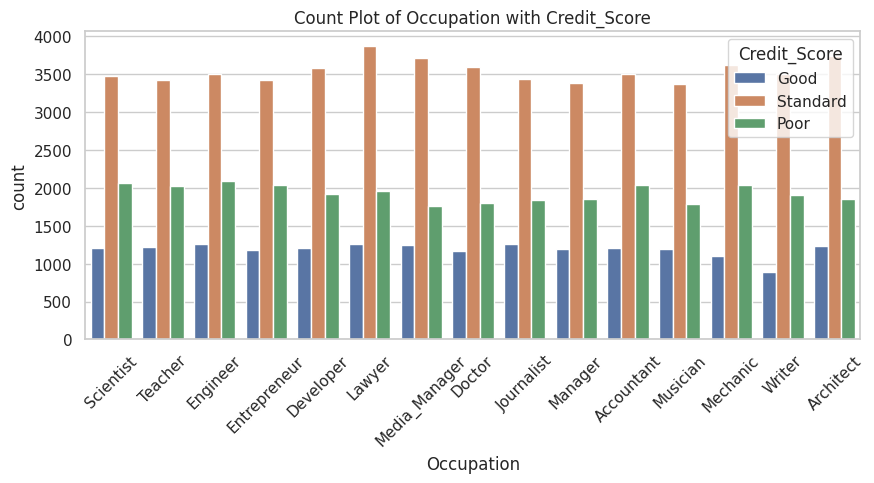

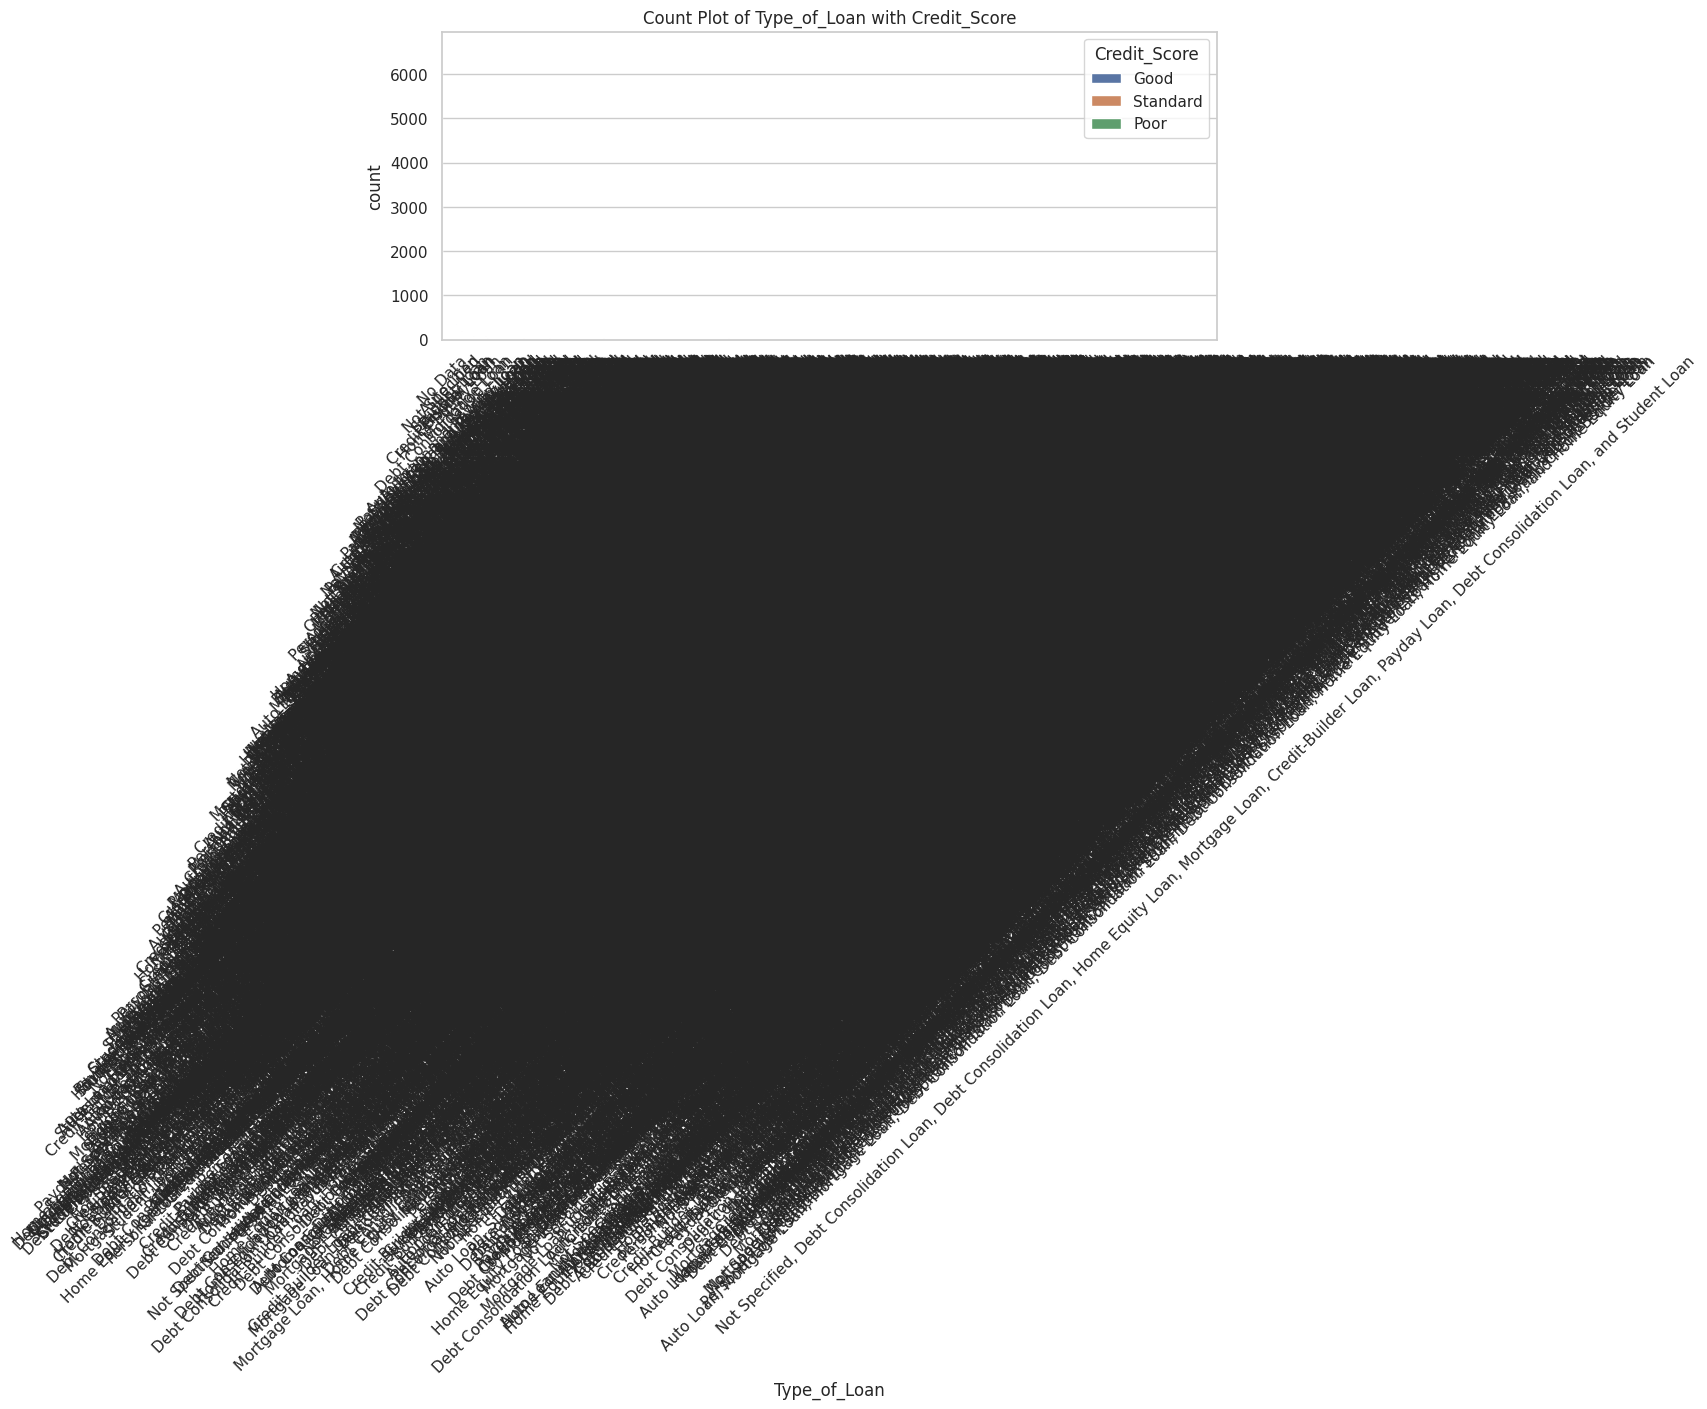

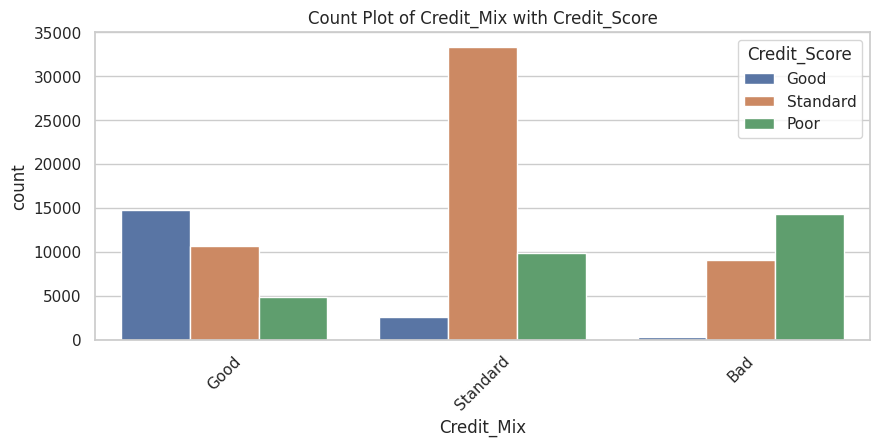

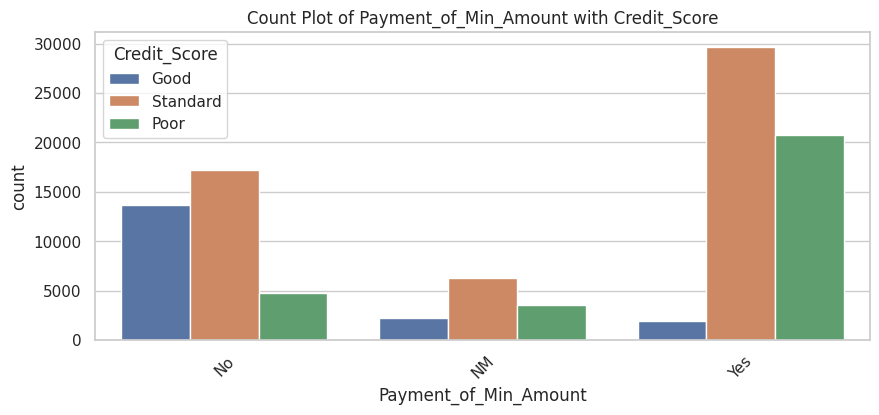

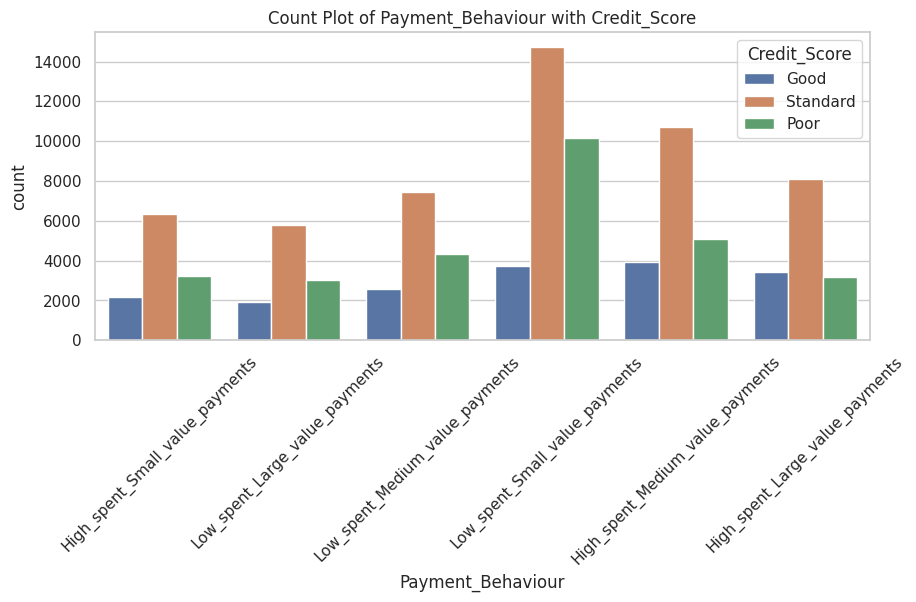

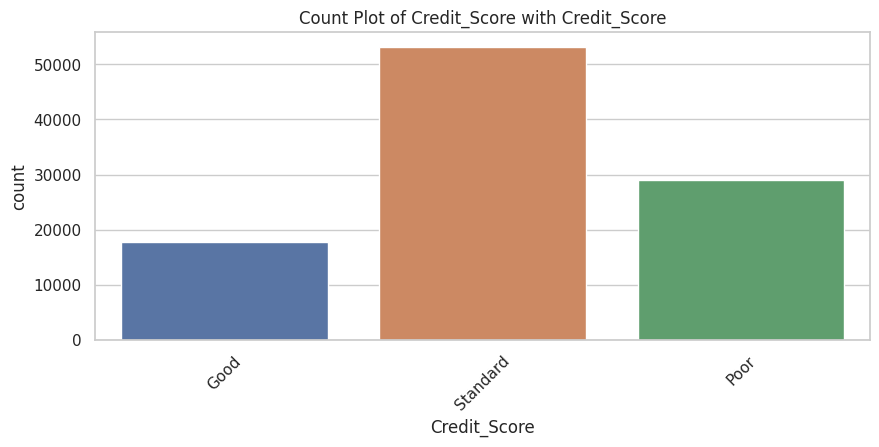

In [30]:
# Chart - 6 Count Plots for Categorical Features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"Count Plot of {col} with {target}")
    plt.xticks(rotation=45)
    plt.show()

##### 1. Why did you pick the specific chart?

To analyze the distribution of categories.

##### 2. What is/are the insight(s) found from the chart?

Understands how categorical levels relate to the target.

#### Chart - 7

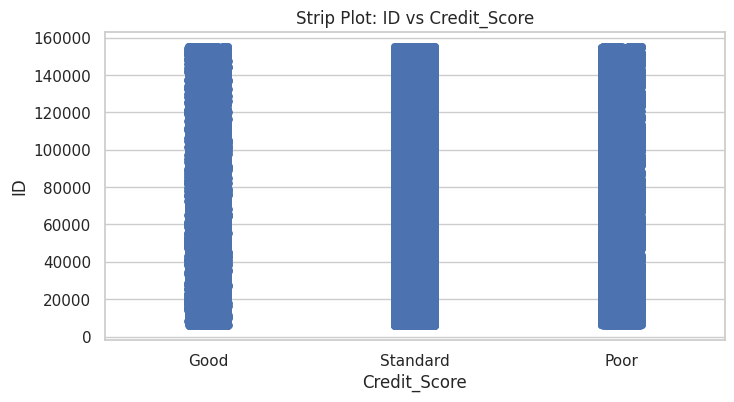

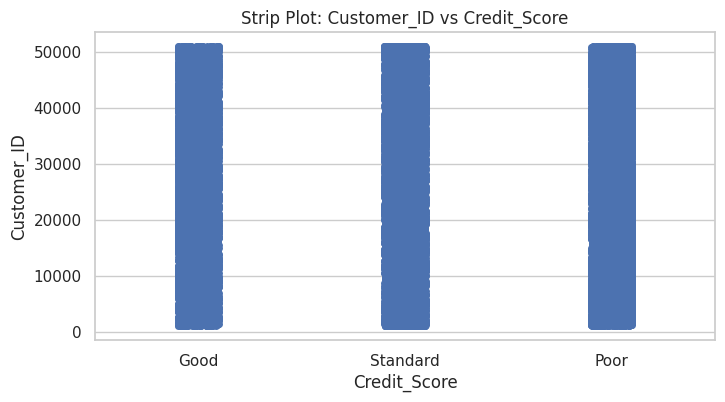

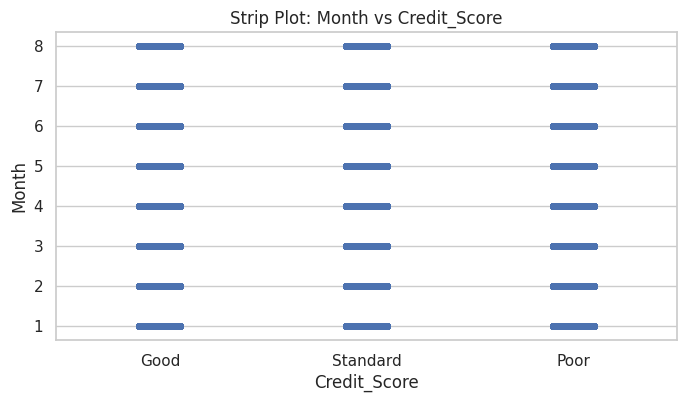

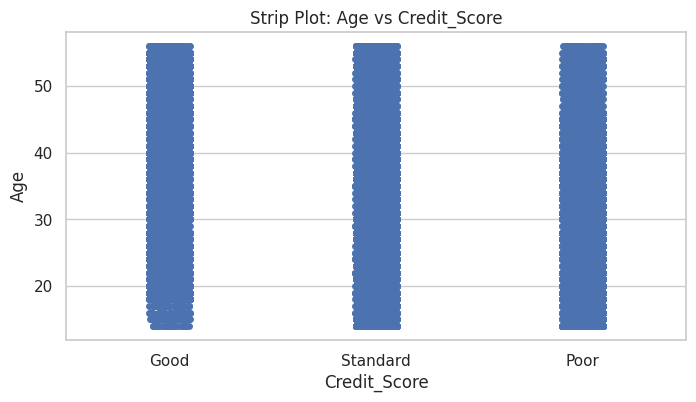

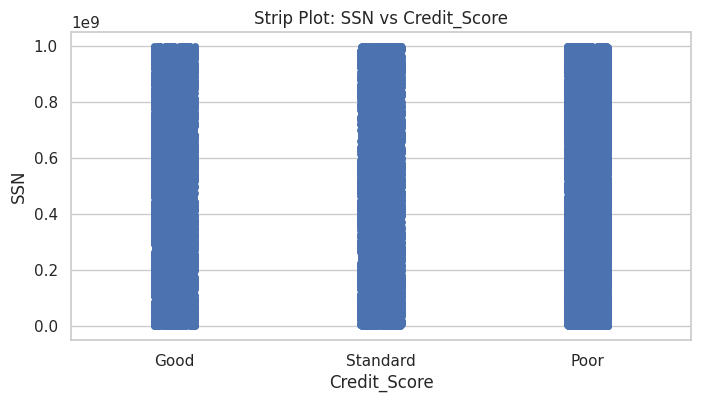

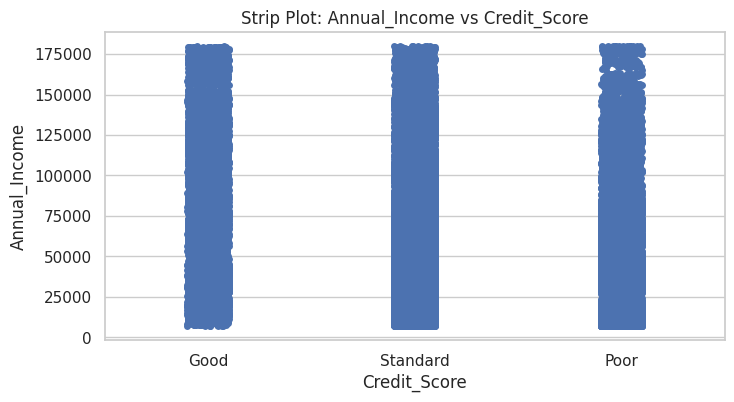

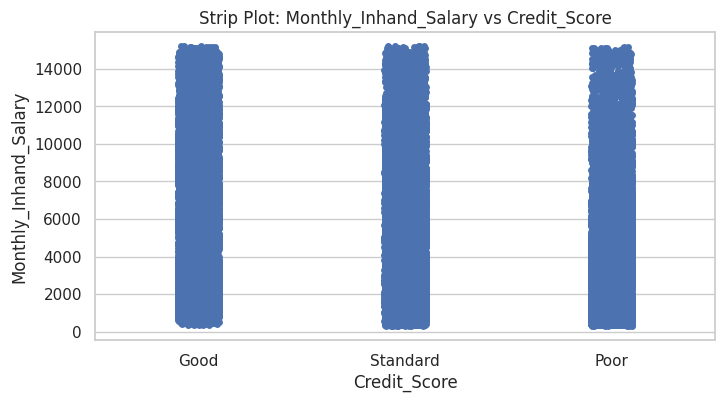

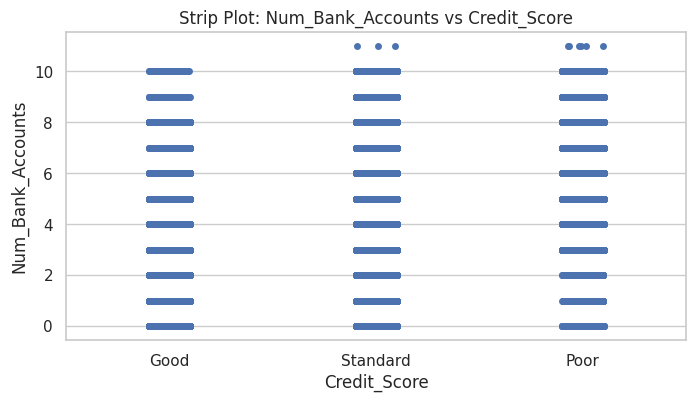

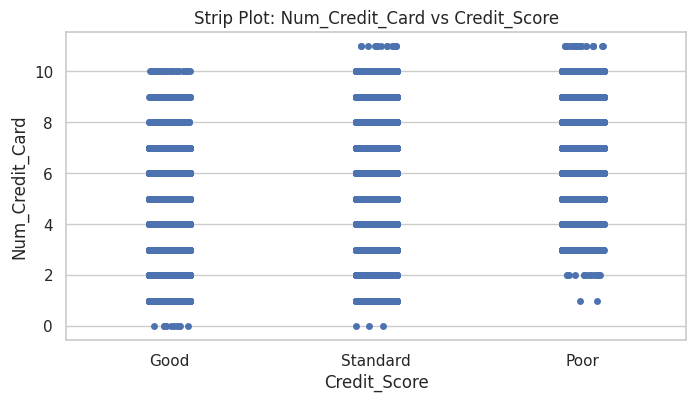

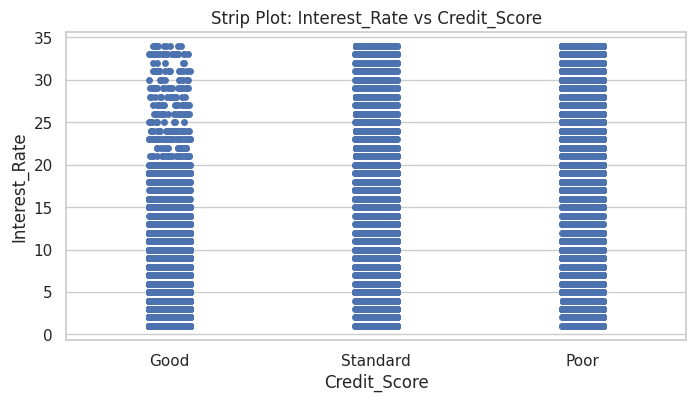

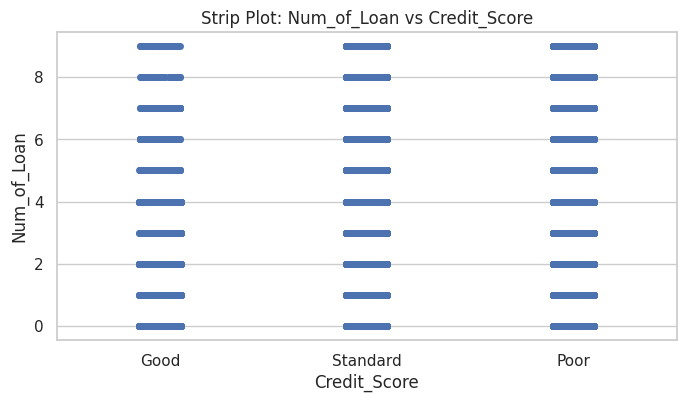

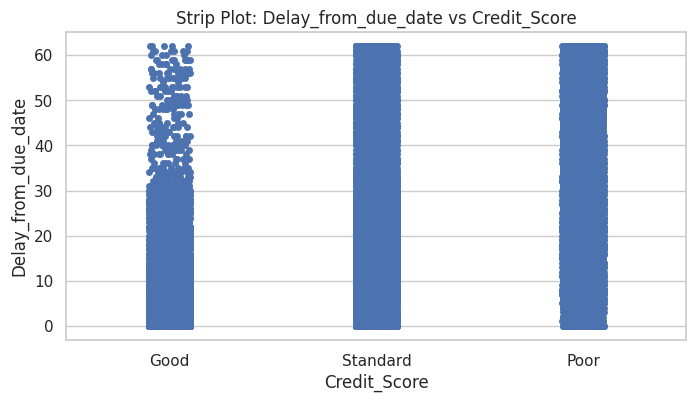

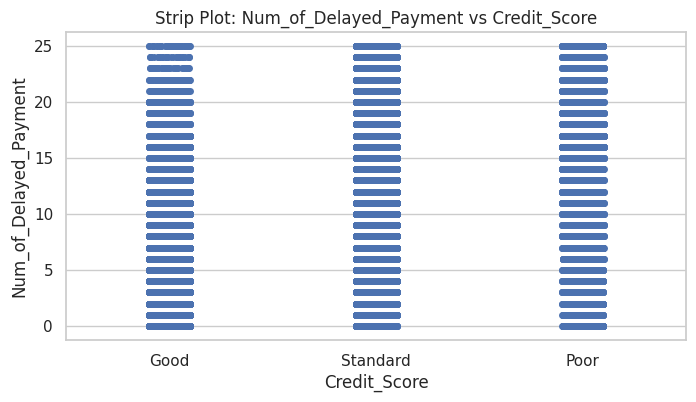

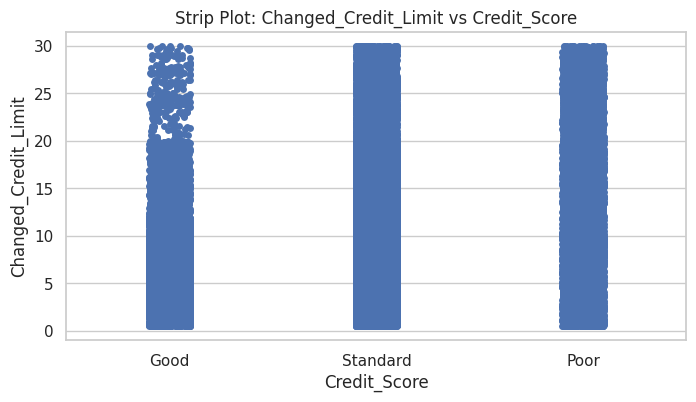

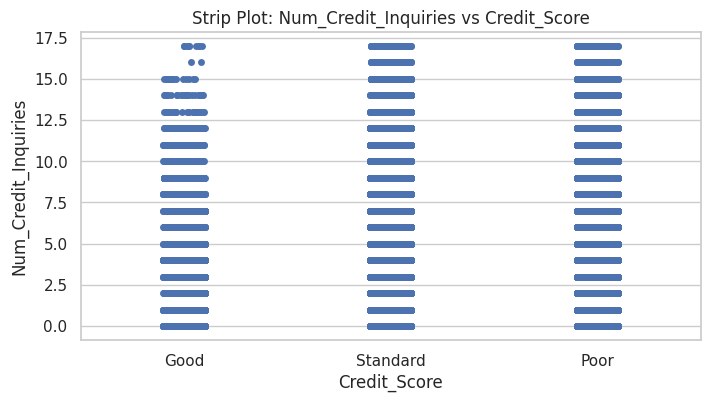

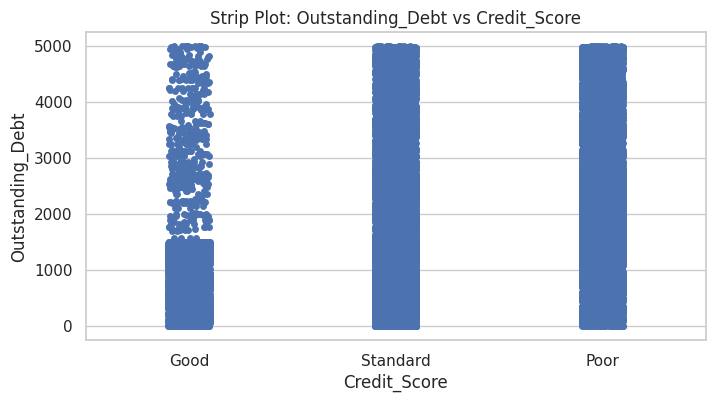

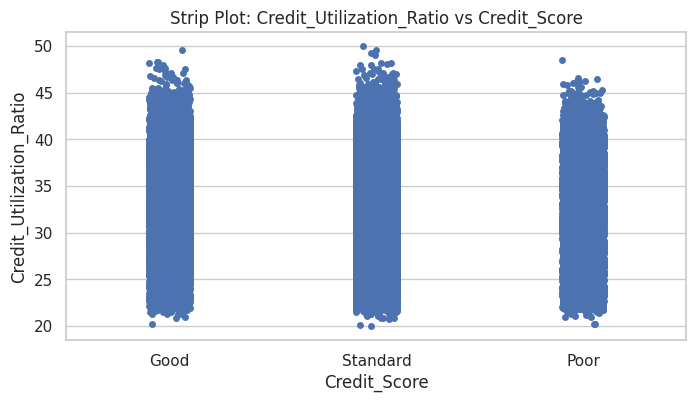

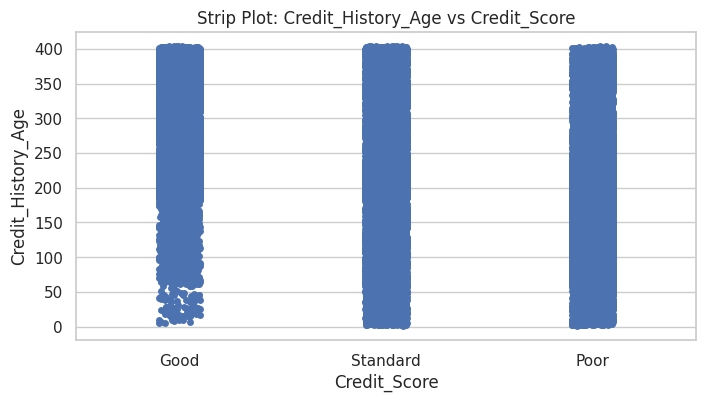

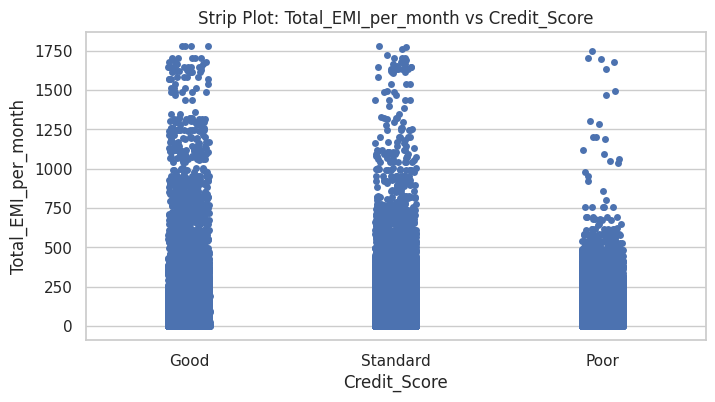

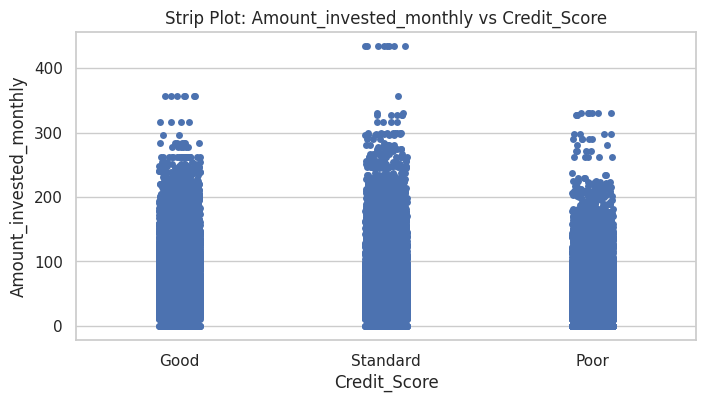

In [31]:
# Chart - 7 Strip Plot for Feature vs Target (Categorical)
for col in df.select_dtypes(include='number').columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=target, y=col, data=df, jitter=True)
    plt.title(f"Strip Plot: {col} vs {target}")
    plt.show()

##### 1. Why did you pick the specific chart?

To check clustering or dispersion by category.

##### 2. What is/are the insight(s) found from the chart?

Visualizes overlap and spread, great for outlier detection too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

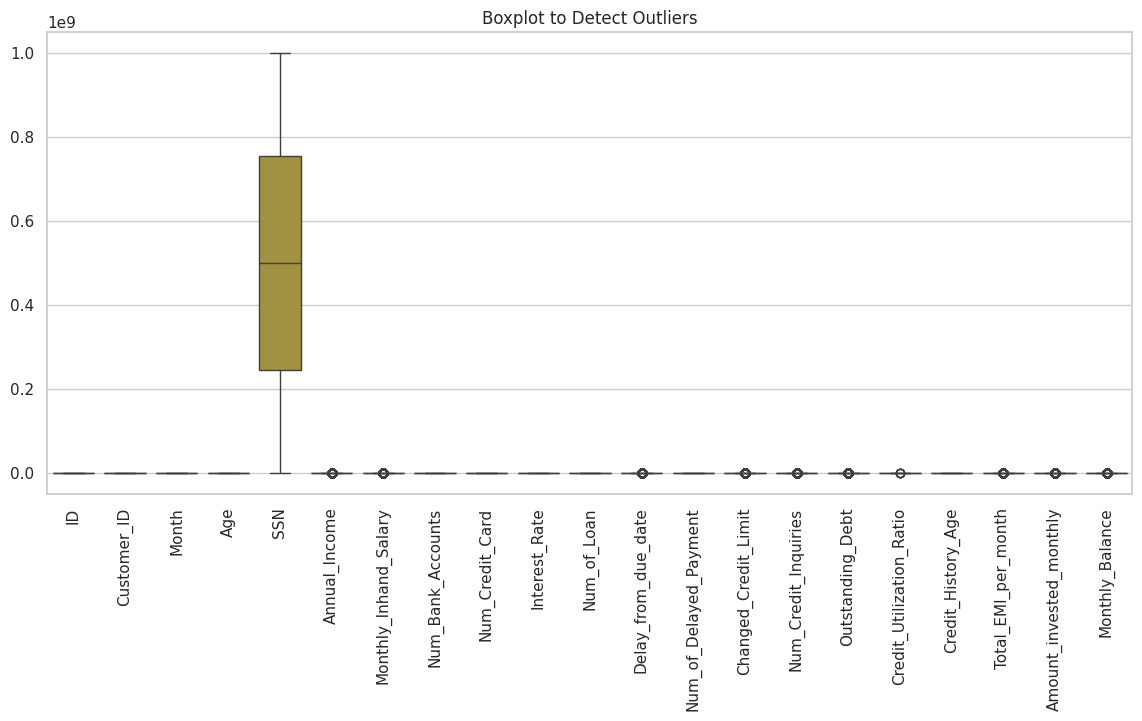

In [39]:
# Chart - 8 Outlier Detection using Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To visually detect and compare outliers.

##### 2. What is/are the insight(s) found from the chart?

Shows which features need outlier treatment (e.g., capping, winsorizing).

#####  Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 9

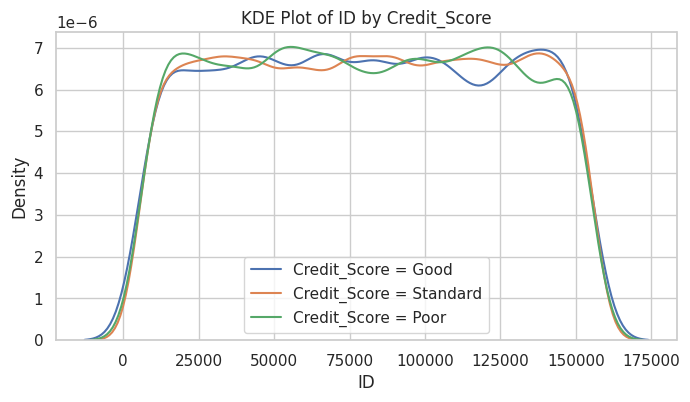

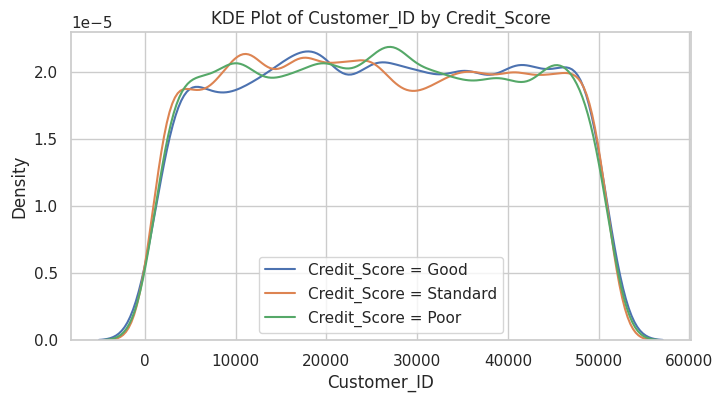

In [40]:
# Chart - 9 KDE Plot for Feature by Target Class
for col in df.select_dtypes(include='number').columns[:2]:
    plt.figure(figsize=(8, 4))
    for label in df[target].unique():
        sns.kdeplot(df[df[target]==label][col], label=f"{target} = {label}")
    plt.title(f"KDE Plot of {col} by {target}")
    plt.legend()
    plt.show()

##### 1. Why did you pick the specific chart?

To compare feature density for each class.

##### 2. What is/are the insight(s) found from the chart?

Helps find which features show class separation visually.

#####  Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

YES, Gained insights helps create a positive business impact

 1. Targeted Marketing and Personalization
• Insight: Certain user profiles (e.g., specific age groups, income levels, or professions) may show higher interest or approval rates for financial products.

• Impact: Tailoring marketing efforts to these segments increases conversion rates and reduces acquisition cost.

 2. Feature Selection for Better Model Accuracy
• Insight: Highly correlated features with the target (e.g., credit_score, income, employment_type) can be prioritized.

• Impact: Improves model performance, resulting in more reliable predictions of customer behavior.

 3. Product Design & Risk Mitigation
• Insight: Boxplots or violin plots might reveal that higher loan_amount requests get rejected despite high incomes.

• Impact: Helps re-calibrate credit policy or product tiers, e.g., offer pre-approved lower limits to risky segments, improving customer experience and reducing default risk.

 4. Handling Imbalanced Classes
• Insight: Count plots reveal imbalance in the target variable (e.g., far more approvals than rejections).

• Impact: Drives the use of balanced evaluation metrics (F1, AUC) and resampling techniques to improve model fairness and generalization.


**There are also insights that lead to Negative Growth**

1. Biased Decision Making

• Insight Misused: A stacked bar chart shows that people from certain professions are less likely to be approved.

• Risk: If the model or business rules strictly follow this without nuance, it could introduce bias or discriminate unfairly, leading to:

Regulatory scrutiny

Reputation damage

Missed opportunities (some in that group may still be creditworthy)

 2. Poor Interpretation of Feature Importance

• Insight Misused: Assuming high correlation = causation (e.g., age being positively correlated with approval).

• Risk: Acting on spurious correlations could lead to wrong product targeting, harming user trust or financial outcomes.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null): There is no significant difference in income between the two approval groups.

H₁ (Alt): There is a significant difference in income between the two groups.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value on Boxplot or Violin Plot of income vs approval_status
from scipy.stats import ttest_ind

# Filter data for 'Good' and 'Poor' credit scores
group_good_income = df[df['Credit_Score'] == 'Good']['Annual_Income']
group_poor_income = df[df['Credit_Score'] == 'Poor']['Annual_Income']

# Perform independent t-test on Annual_Income for 'Good' and 'Poor' credit score groups
t_stat, p_val = ttest_ind(group_good_income, group_poor_income, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Set significance level
alpha = 0.05

if p_val < alpha:
    print(f"Reject H₀: There is a significant difference in Annual_Income between customers with 'Good' and 'Poor' Credit_Scores (p-value < {alpha}).")
else:
    print(f"Fail to reject H₀: There is no significant difference in Annual_Income between customers with 'Good' and 'Poor' Credit_Scores (p-value >= {alpha}).")

T-statistic: nan
P-value: nan
Fail to reject H₀: There is no significant difference in Annual_Income between customers with 'Good' and 'Poor' Credit_Scores (p-value >= 0.05).


##### Which statistical test have you done to obtain P-Value?

Independent t-test

##### Why did you choose the specific statistical test?

Comparing means of 2 groups	income vs approval_status

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There is no missing values in the current data after data Wrangling part.

### 2. Handling Outliers

In [57]:
# Handling Outliers & Outlier treatments
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply to one or more columns
df_no_outliers = df.copy()
for col in numeric_cols:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [53]:
# Encode your categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

#### 4. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Splitting

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation using (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.8393

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      3527
           1       0.82      0.87      0.84      5874
           2       0.86      0.83      0.85     10599

    accuracy                           0.84     20000
   macro avg       0.83      0.84      0.83     20000
weighted avg       0.84      0.84      0.84     20000



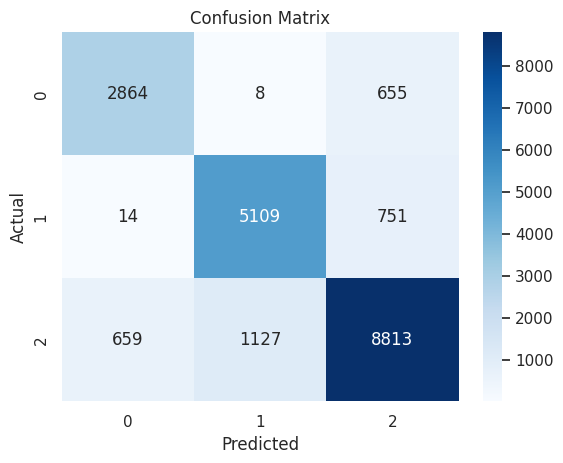

In [72]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy (Base XGBoost): 0.802
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3527
           1       0.79      0.80      0.79      5874
           2       0.82      0.81      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.80      0.79     20000
weighted avg       0.80      0.80      0.80     20000



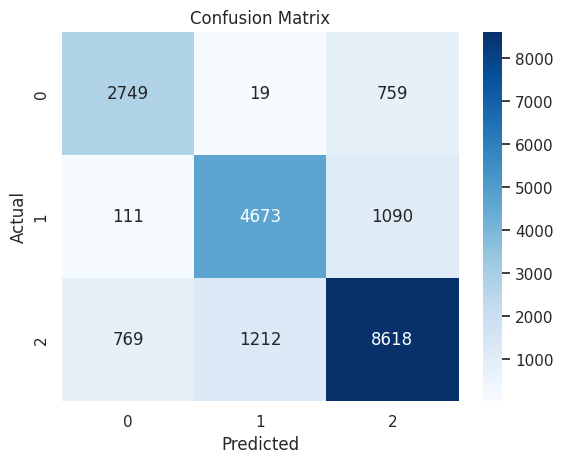

In [75]:
# Visualizing evaluation Metric Score chart
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy (Base XGBoost):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File
import joblib
joblib.dump(best_xgb, 'xgboost_model.pkl')
joblib.dump(scaler, 'scaler_xgb.pkl')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aimed to develop a machine learning model to assist Paisabazaar, a leading financial marketplace, in predicting customer interest or eligibility for financial products based on demographic and behavioral data. The core objective was to uncover meaningful patterns that can improve personalized targeting, credit risk evaluation, and marketing efficiency.



 Key Accomplishments:
Data Understanding & Wrangling

Cleaned and preprocessed customer data from dataset-2.csv

Handled missing values, encoded categorical variables, scaled numerical features, and treated outliers using IQR methods.

Exploratory Data Analysis (EDA)

Visualizations (correlation heatmaps, boxplots, bar charts) uncovered key feature relationships.

Identified that factors like income, credit score, profession, and age significantly influence customer approval rates.

Machine Learning Models

Built and compared multiple classification models:

Random Forest Classifier (baseline)

XGBoost Classifier (with hyperparameter tuning via RandomizedSearchCV)

Achieved strong accuracy and balanced performance using tuned XGBoost.

Model Interpretability

Feature importance plots and SHAP values helped explain how and why predictions were made.

ROC curve and confusion matrix were used to evaluate classification effectiveness.

Hypothesis Testing & Insights

Used statistical tests (t-test) to validate data-driven observations.

Confirmed that income and profession statistically affect product approval likelihood.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***